
Graph Theory Analysis for SCIFES Data 
============================================


### Group Names and Descriptions
<table style="width:50%; border:1px solid black; border-collapse:collapse; align=left">
  <tr>
    <th style="text-align:left; border:1px solid black; padding:4px;">Group Name</th>
    <th style="text-align:left; border:1px solid black; padding:4px;">Description</th>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">cFES-pre</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling with FES, pre-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">cFES-post</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling with FES, post-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">c-pre</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling only (no FES), pre-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">c-post</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling only (no FES), post-intervention</td>
  </tr>
</table> 

####  1. Load important libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets
from nilearn import plotting 

# Using the NiftiLabelsMasker
# from nilearn.input_data import NiftiLabelsMasker
from nilearn.maskers import NiftiLabelsMasker


# /Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: 
#         FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. 
#             Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. 
#             Please import from 'nilearn.maskers' instead.
            
from nilearn.connectome import ConnectivityMeasure #communitymeasures
from brainconn import degree, centrality, clustering, core, distance, modularity, utils

from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as stats
from statsmodels.robust.scale import huber

import scipy.io
import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

 
from scipy.stats import rankdata
from joblib import Parallel, delayed
from tqdm import tqdm

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


####  2. Setup atlas, labels and review brain colormaps

Atlas ROIs are located in nifti image (4D) at: /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


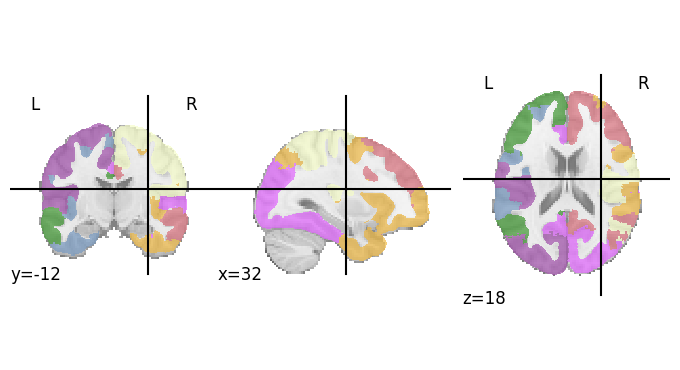

In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# Plot the ROI and save as PDF
fig = plotting.plot_roi(atlas_filename, cmap=cmap)
fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

####  3. setup group labels for load funtional data 

In [3]:
# #%% Load the functional datasets (pre mid post FES, NFES) and 
# # extract signals (timeseries) on a parcellation defined by labels
# # then calculating the correlation and binarized matrices
# # ----------------------------------------------------

# # masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
# #                            memory='nilearn_cache', verbose=5)

# masker = NiftiLabelsMasker(
#     labels_img=atlas_filename,
#     standardize="zscore_sample",
#     standardize_confounds="zscore_sample",
#     memory="nilearn_cache",
#     verbose=5,
# )

# data_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data'

# # analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY


# # if analysis == "ALL":
# #     group = ['pre_fes', 'pre_nfes', 'mid_fes', 'mid_nfes', 'post_fes', 'post_nfes']; 
# #     group_label = ['Pre FES', 'Pre Non-FES', 'Post NFES']
# # #     group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']

# # elif analysis == "Group":
# #     group = ['fes', 'nfes']; group_label = ['FES', 'Non-FES']

# corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


#### 4. Load fMRI data runs for each group, extract timeseries (ts) and save a copy.

In [4]:
group_label = ['cFES-pre', 'cFES-post', 'c-pre', 'c-post']

#### 5. Load community labels  from matlab

In [5]:
# #%% Consensus community label assigment
# n_set = 4
# # 200xn

# ## Lee etal Method
# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S1_comm_label.mat', squeeze_me=True)['N_all_g1']; #PreFES 
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S2_comm_label.mat', squeeze_me=True)['N_all_g2']; #PreSham 
# S_g3 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S3_comm_label.mat', squeeze_me=True)['N_all_g3']; #PostFES
# S_g4 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S4_comm_label.mat', squeeze_me=True)['N_all_g4']; #PostSham

# communities = [S_g1, S_g2, S_g3, S_g4]

# S1_cFES_pre = S_g1
# S2_c_pre = S_g2
# S3_cFES_post = S_g3
# S4_c_post = S_g4

In [6]:
# len(S2_c_pre)
# np.shape(S2_c_pre)
# np.shape(S4_c_post)
# type(S4_c_post)

#### 6. Compute RC, IC, MA values 

In [7]:
# atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
# labels = atlas.labels.astype('U') # covert array of bytes to array of strings
# # group_label = ['Pre FES', 'Post FES', 'Pre NFES']
# # create static communities (networks' labels)
# networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
# static_communities = np.zeros((200,))
# # find networks in atlas.labels and assign a label[1-7] to each
# for i, network in enumerate(networks):   
#     idx = np.array([network in s for s in labels], dtype=bool)
#     static_communities[idx] = i+1 # 1-7

# allegiance, flexibility, integration, recruitment, promiscuity = [], [], [], [], []
# allegiance_coarse = []

# # Find index where elements change value in static_communities array
# pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
# pivot = np.concatenate([pivot,[199]]) 

# def create_coarse_allegiance(allegiance):
#     allegiance_coarse_lr = np.zeros((14,14))
#     p1, q1 = 0, 0
#     for i, p2 in enumerate(pivot):
#         for j, q2 in enumerate(pivot):
#             allegiance_coarse_lr[i,j] = np.nanmean(allegiance[p1:p2+1, q1:q2+1])
#             q1 = q2+1
#         p1 = p2+1
#         q1 = 0    
#     # If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
#     allegiance_coarse = np.mean(allegiance_coarse_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)   
#     return allegiance_coarse

# for s in range(n_set):
    
#     allegiance.append(communitymeasures.allegiance(communities[s]))  
#     flexibility.append(communitymeasures.flexibility(communities[s]))
#     integration.append(communitymeasures.integration(communities[s], static_communities))
#     recruitment.append(communitymeasures.recruitment(communities[s], static_communities))
#     promiscuity.append(communitymeasures.promiscuity(communities[s])) # 0 entails only 1 community. 1 entails all communities
#     allegiance_coarse.append(create_coarse_allegiance(allegiance[s]))
        
# #plt.imshow(allegiance_coarse[1])
# #plt.colorbar()
# # 1=pre_fes; 2=pre_nfes; 3=post_fes

# # regression between two groups [integration, recruitment]
# # define permutation test using monte-carlo method



#### 7. Previous permutation test

In [8]:
# # PreFES vs PostFES
# # rec & int coeff.
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_cFES_pre.npy', recruitment[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_cFES_pre.npy', integration[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_c_pre.npy', recruitment[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_c_pre.npy', integration[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_cFES_post.npy', recruitment[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_cFES_post.npy', integration[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_c_post.npy', recruitment[3])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_c_post.npy', integration[3])

# # alg mtrx
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_cFES_pre.npy', allegiance[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_c_pre.npy', allegiance[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_cFES_post.npy', allegiance[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_c_post.npy', allegiance[3])
# # corr mxt
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_cFES_pre.npy', corr_g1_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_c_pre.npy', corr_g2_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_cFES_post.npy', corr_g5_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_c_post.npy', corr_g6_mean)

# print(f'File saved!')


#### 8. Load saved data (RC, IC, AM & LEMS)

In [14]:
# Load the data from the .npy files
os.chdir('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/npy_saved/')

# Recruitment and Integration Coefficient values
cFES_pre_rec = np.load('recruitment_cFES_pre.npy')
cFES_pre_int = np.load('integration_cFES_pre.npy')

c_pre_rec = np.load('recruitment_c_pre.npy')
c_pre_int = np.load('integration_c_pre.npy')

cFES_post_rec = np.load('recruitment_cFES_post.npy')
cFES_post_int = np.load('integration_cFES_post.npy')

c_post_rec = np.load('recruitment_c_post.npy')
c_post_int = np.load('integration_c_post.npy')

# Allegiance matrix values
alg_cFES_pre = np.load('allegiance_cFES_pre.npy')
alg_c_pre = np.load('allegiance_c_pre.npy')

alg_cFES_post = np.load('allegiance_cFES_post.npy')
alg_c_post = np.load('allegiance_c_post.npy')

# correlation files Pre-Post cFES and cycling
corr_cFES_pre = np.load('corr_cFES_pre.npy')
corr_c_pre = np.load('corr_c_pre.npy')

corr_cFES_post = np.load('corr_cFES_post.npy')
corr_c_post = np.load('corr_c_post.npy')

# community labels
S1_cFES_pre = np.load('S_g1_cFES_pre.npy') 
S2_c_pre = np.load('S_g2_c_pre.npy')
S3_cFES_post = np.load('S_g3_cFES_post.npy')
S4_c_post = np.load('S_g4_c_post.npy')

# BM LEMS scores
cfes_pre_lems = np.array([5, 8,19,43,0,6,5])
cfes_post_lems = np.array([8,11,17,45,0,14,6])

c_pre_lems = np.array([0,39,4,9,0])
c_post_lems = np.array([0,37,6,11,3])

print(alg_cFES_pre.shape)
# cFES_pre', 'cFES_post', 'c_pre', 'c_post'

(200, 200)


#### 9. Extract SMN Region 

In [17]:
import numpy as np

def extract_SMN_slices(x_rec, z_rec, x_in, z_in, idx1=(14, 30), idx2=(115, 134)):
    """
    Extracts and concatenates specific slices from input arrays to isolate the SMN region.
    
    Parameters:
    - x_rec, z_rec: Recruitment arrays (pre, post)
    - x_in, z_in: Integration arrays (pre, post)
    - idx1, idx2: Tuples indicating the start and end slice indices (default SMN: 14–30 and 115–134)

    Returns:
    - x_rec_SMN, z_rec_SMN, x_in_SMN, z_in_SMN: Concatenated SMN slices
    """

    def concat_slices(arr, idx1, idx2):
        return np.concatenate((arr[idx1[0]:idx1[1]], arr[idx2[0]:idx2[1]]))

    x_rec_SMN = concat_slices(x_rec, idx1, idx2)
    z_rec_SMN = concat_slices(z_rec, idx1, idx2)
    x_in_SMN  = concat_slices(x_in,  idx1, idx2)
    z_in_SMN  = concat_slices(z_in,  idx1, idx2)

    print(f"SMN shape: {x_rec_SMN.shape}-{z_rec_SMN.shape}-{x_in_SMN.shape}-{z_in_SMN.shape}\n")


    return x_rec_SMN, z_rec_SMN, x_in_SMN, z_in_SMN



def extract_smn_block(alg_a, alg_b, idx1=(14, 30), idx2=(115, 134), verbose=True):
    """
    Extract and stack submatrices from allegiance matrices to form 35x35 SMN matrices.

    Parameters:
    - alg_a, alg_b: Input allegiance matrices (e.g., from pre/post or condition A/B)
    - idx1, idx2: Tuples of (start, end) indices for two brain subregions
    - verbose: Whether to print matrix shapes

    Returns:
    - alg_smn_a, alg_smn_b: Two (35, 35) allegiance submatrices
    """
    i1_start, i1_end = idx1
    i2_start, i2_end = idx2

    def extract_block(matrix):
        s1 = matrix[i1_start:i1_end, i1_start:i1_end]
        s2 = matrix[i1_start:i1_end, i2_start:i2_end]
        s3 = matrix[i2_start:i2_end, i1_start:i1_end]
        s4 = matrix[i2_start:i2_end, i2_start:i2_end]
        top = np.hstack((s1, s2))
        bottom = np.hstack((s3, s4))
        return np.vstack((top, bottom))

    alg_smn_a = extract_block(alg_a)
    alg_smn_b = extract_block(alg_b)

    if verbose:
        print(f"cl/SMN matrix shape : {alg_smn_a.shape} - {alg_smn_b.shape}")

    return alg_smn_a, alg_smn_b
# alg_smn_a, alg_smn_b = extract_smn_block(alg_cFES_pre, alg_cFES_post)

def extract_smn_block1(matrix_a, matrix_b, row_ranges=((14, 30), (115, 134)), label_a="pre", label_b="post"):
    """
    Extracts and stacks rows from two matrices to isolate SMN regions.

    Parameters:
    - matrix_a, matrix_b: Input matrices to slice (e.g., S1_cFES_pre, S3_cFES_post)
    - row_ranges: Tuple of two (start, end) index pairs indicating rows to extract
    - label_a, label_b: Optional labels to identify the two conditions in printed output

    Returns:
    - smn_a, smn_b: Extracted and stacked SMN matrices
    """
    slice1_a = matrix_a[row_ranges[0][0]:row_ranges[0][1], :]
    slice2_a = matrix_a[row_ranges[1][0]:row_ranges[1][1], :]
    smn_a = np.vstack((slice1_a, slice2_a))
   

    slice1_b = matrix_b[row_ranges[0][0]:row_ranges[0][1], :]
    slice2_b = matrix_b[row_ranges[1][0]:row_ranges[1][1], :]
    smn_b = np.vstack((slice1_b, slice2_b))
    print(f'SMN matrix_a shape: {smn_a.shape}-{smn_b.shape}')

    return smn_a, smn_b


In [18]:
# Group #1: cFES vs. Sham (for example)
# cFES_pre_rec, cFES_pre_int, c_pre_rec, c_pre_int
# alg_cFES_pre post 
# alg_c_pre post

# x_rec = cFES_pre_rec
# z_rec = cFES_post_rec
# x_in = cFES_pre_int
# z_in = cFES_post_int

# x_rec = cFES_pre_rec
# z_rec = cFES_post_rec
# x_in = cFES_pre_int
# z_in = cFES_post_int

# fes_pre = x_rec_SMN_cfes 
# fes_post = z_rec_SMN_cfes 
# cycling_pre = x_rec_SMN_c 
# cycling_post = z_rec_SMN_c cFES_pre_rec

# cl_pre_SMN_cfes, cl_post_SMN_cfes
# cl_pre_SMN_c, cl_post_SMN_c

# x_alg_SMN_cfes, z_alg_SMN_cfes
# x_alg_SMN_c, z_alg_SMN_c

# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c


cl_pre_SMN_cfes, cl_post_SMN_cfes = extract_smn_block1(S1_cFES_pre, S3_cFES_post)
cl_pre_SMN_c, cl_post_SMN_c = extract_smn_block1(S2_c_pre, S4_c_post)

x_alg_SMN_cfes, z_alg_SMN_cfes = extract_smn_block(alg_cFES_pre, alg_cFES_post)
x_alg_SMN_c, z_alg_SMN_c = extract_smn_block(alg_c_pre, alg_c_post)

x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c = extract_SMN_slices(cFES_pre_rec, cFES_post_rec, c_pre_rec, c_post_rec)
x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c = extract_SMN_slices(cFES_pre_int, cFES_post_int, c_pre_int, c_post_int)

SMN matrix_a shape: (35, 14)-(35, 14)
SMN matrix_a shape: (35, 10)-(35, 10)
cl/SMN matrix shape : (35, 35) - (35, 35)
cl/SMN matrix shape : (35, 35) - (35, 35)
SMN shape: (35,)-(35,)-(35,)-(35,)

SMN shape: (35,)-(35,)-(35,)-(35,)



In [19]:
# Print mean and std of AM, RC & IC
def print_stats(name, arr):
    arr = np.nan_to_num(np.array(arr), nan=0.0)  # Replace NaNs with 0
    mean_val = np.mean(arr)
    std_val = np.std(arr)
    print(f"{name:20s} | Mean: {mean_val:.4f} ± {std_val:.4f}")

# Allegiance matrices (2D)
print_stats("pre_alg_SMN_cfes", x_alg_SMN_cfes)
print_stats("post_alg_SMN_cfes", z_alg_SMN_cfes)
print_stats("pre_alg_SMN_c", x_alg_SMN_c)
print_stats("post_alg_SMN_c", z_alg_SMN_c)

# Recruitment Coeff. (1D)
print_stats("pre_rec_SMN_cfes", x_rec_SMN_cfes)
print_stats("post_rec_SMN_cfes", z_rec_SMN_cfes)
print_stats("pre_rec_SMN_c", x_rec_SMN_c)
print_stats("post_rec_SMN_c", z_rec_SMN_c)

# Integration Coeff. (1D)
print_stats("pre_int_SMN_cfes", x_int_SMN_cfes)
print_stats("post_int_SMN_cfes", z_int_SMN_cfes)
print_stats("pre_int_SMN_c", x_int_SMN_c)
print_stats("post_int_SMN_c", z_int_SMN_c)


pre_alg_SMN_cfes     | Mean: 0.6918 ± 0.1702
post_alg_SMN_cfes    | Mean: 0.7031 ± 0.1876
pre_alg_SMN_c        | Mean: 0.6919 ± 0.2227
post_alg_SMN_c       | Mean: 0.6214 ± 0.1989
pre_rec_SMN_cfes     | Mean: 0.7121 ± 0.0586
post_rec_SMN_cfes    | Mean: 0.7238 ± 0.0540
pre_rec_SMN_c        | Mean: 0.7123 ± 0.0899
post_rec_SMN_c       | Mean: 0.6397 ± 0.0801
pre_int_SMN_cfes     | Mean: 0.2466 ± 0.0166
post_int_SMN_cfes    | Mean: 0.2847 ± 0.0215
pre_int_SMN_c        | Mean: 0.2931 ± 0.0157
post_int_SMN_c       | Mean: 0.2801 ± 0.0172


#### 10. Paired permutation test (whole difference p-value)

In [ ]:
# # x_rec_SMN z_rec_SMN x_in_SMN z_in_SMN
    
# # Sample data: 7 subjects, pre and post treatment
# # pre = np.array([3.1, 2.7, 4.0, 3.5, 2.9, 3.8, 4.1])
# # post = np.array([3.8, 3.0, 4.5, 4.1, 3.0, 4.2, 4.4])
 
# pre = x_rec_SMN #real data n=35
# post = z_rec_SMN #real data n=35
    
# # Step 1: Compute pre-post difference
# diff = post - pre
# observed_stat = np.mean(diff)
 
# # Step 2: Generate all 2^7 = 128 sign-flip permutations
# sign_flips = np.array(list(product([-1, 1], repeat=len(diff))))
# perm_stats = np.array([np.mean(diff * flip) for flip in sign_flips])
 
# # Step 3: Compute two-sided p-value
# p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
 
# # Step 4: Plot the permutation null distribution
# plt.hist(perm_stats, bins=20, color='lightgray', edgecolor='black')
# plt.axvline(observed_stat, color='red', linestyle='--', label='Observed Mean')
# plt.axvline(-observed_stat, color='red', linestyle='--')
# plt.title("Permutation Test (Mean-Based)")
# plt.xlabel("Permuted Mean Differences")
# plt.ylabel("Frequency")
# plt.legend()
# plt.tight_layout()
# plt.show()
 
# # Step 5: Report results
# print(f"Observed mean difference:   {observed_stat:.4f}")
# print(f"Exact permutation p-value:  {p_value:.4f}")
 
# # Test using median as test statistics:
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import product
 
# # Sample data: 7 subjects, pre and post treatment
# # pre = np.array([3.1, 2.7, 4.0, 3.5, 2.9, 3.8, 4.1])
# # post = np.array([3.8, 3.0, 4.5, 4.1, 3.0, 4.2, 4.4])

# pre = x_rec_SMN #real data n=35
# post = z_rec_SMN #real data n=35
 
# # Step 1: Compute pre-post difference
# diff = post - pre
# observed_stat = np.median(diff)
 
# # Step 2: Generate all 2^7 = 128 sign-flip permutations
# sign_flips = np.array(list(product([-1, 1], repeat=len(diff))))
# perm_stats = np.array([np.median(diff * flip) for flip in sign_flips])
 
# # Step 3: Compute two-sided p-value
# p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))
 
# # Step 4: Plot the permutation null distribution
# plt.hist(perm_stats, bins=20, color='lightgray', edgecolor='black')
# plt.axvline(observed_stat, color='red', linestyle='--', label='Observed Median')
# plt.axvline(-observed_stat, color='red', linestyle='--')
# plt.title("Permutation Test (Median-Based)")
# plt.xlabel("Permuted Median Differences")
# plt.ylabel("Frequency")
# plt.legend()
# plt.tight_layout()
# plt.show()
 
# # Step 5: Report results
# print(f"Observed median difference: {observed_stat:.4f}")
# print(f"Exact permutation p-value:  {p_value:.4f}")

#### 11. Within group analysis (Pre vs Post)

In [75]:
def permutation_test(pre, post, stat_func=np.mean, n_permutations=10000, plot=True, random_state=42):
    """
    Performs a paired permutation test using random sign flips.
    
    Parameters:
    - pre, post: paired data arrays
    - stat_func: np.mean or np.median (or any function over 1D array)
    - n_permutations: number of random sign flips
    - plot: whether to show the histogram
    - random_state: for reproducibility
    
    Returns:
    - observed_stat, p_value
    """
    pre = np.asarray(pre)
    post = np.asarray(post)

    assert pre.shape == post.shape, "pre and post must have the same shape"

    rng = np.random.default_rng(random_state)
    diff = post - pre
    observed_stat = stat_func(diff)

    # Generate random sign flips (shape: n_permutations x n_samples)
    signs = rng.choice([-1, 1], size=(n_permutations, len(diff)))
    perm_diffs = signs * diff  # Each row is one permuted sample
    perm_stats = np.apply_along_axis(stat_func, 1, perm_diffs)

    # Two-sided p-value with optional continuity correction
    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))

    if plot:
        plt.hist(perm_stats, bins=30, color='lightgray', edgecolor='black')
        plt.axvline(observed_stat, color='red', linestyle='--', label=f'Observed {stat_func.__name__.capitalize()}')
        plt.axvline(-observed_stat, color='red', linestyle='--')
        plt.title(f"Paired Permutation Test ({stat_func.__name__.capitalize()}-Based)")
        plt.xlabel("Permuted Differences")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return observed_stat, p_value


def perm_test(xs, ys, nmc): 
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc


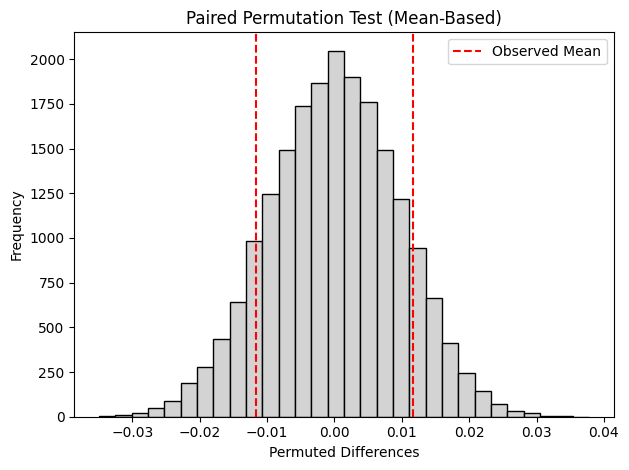

RC[Mean-based cFES] Observed: 0.011645, P-value: 0.231100


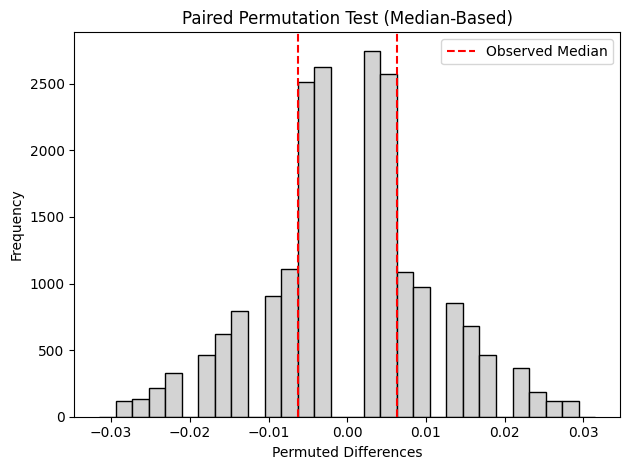

RC[Median-based cFES] Observed: 0.006303, P-value: 0.476900



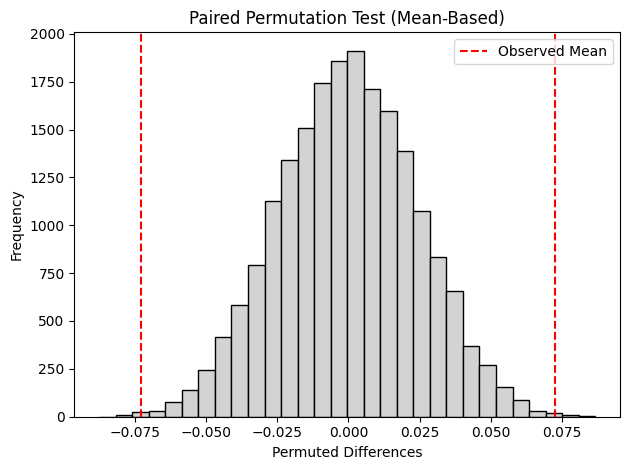

RC[Mean-based cycling] Observed: -0.072605, P-value: 0.00195


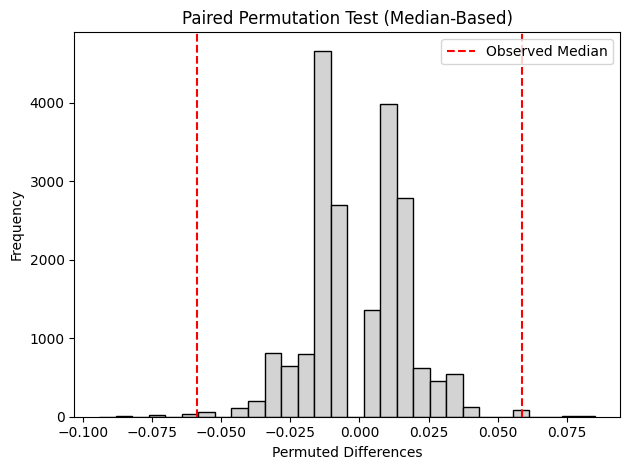

RC[Median-based cycling] Observed: -0.058824, P-value: 0.004400


In [27]:
# Paired Permutation test with Recruitment Coefficient values

# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

# RC Pre vs Post
# Mean-based permutation test
observed_mean, pval_mean = permutation_test(x_rec_SMN_cfes, z_rec_SMN_cfes, stat_func=np.mean, n_permutations=20000)
print(f"RC[Mean-based cFES] Observed: {observed_mean:.6f}, P-value: {pval_mean:.6f}")

# Median-based permutation test
observed_median, pval_median = permutation_test(x_rec_SMN_cfes, z_rec_SMN_cfes, stat_func=np.median, n_permutations=20000)
print(f"RC[Median-based cFES] Observed: {observed_median:.6f}, P-value: {pval_median:.6f}\n")

#Cycling Pre v Post
# Mean-based permutation test
observed_mean, pval_mean = permutation_test(x_rec_SMN_c, z_rec_SMN_c, stat_func=np.mean, n_permutations=20000)
print(f"RC[Mean-based cycling] Observed: {observed_mean:.6f}, P-value: {pval_mean:.6}")

# Median-based permutation test
observed_median, pval_median = permutation_test(x_rec_SMN_c, z_rec_SMN_c, stat_func=np.median, n_permutations=20000)
print(f"RC[Median-based cycling] Observed: {observed_median:.6f}, P-value: {pval_median:.6f}")


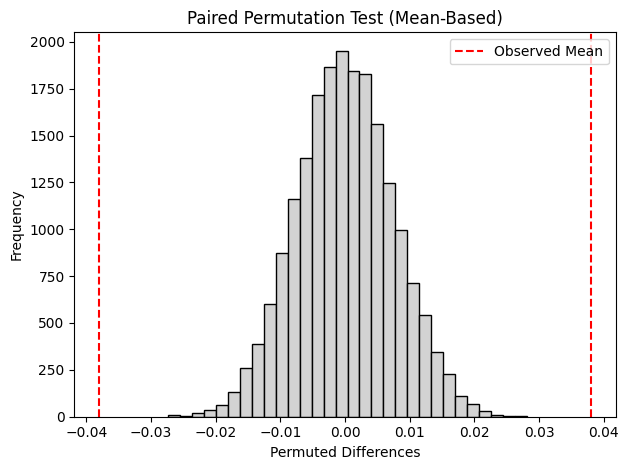

IC[Mean-based cFES] Observed: 0.038046, P-value: 0.000000


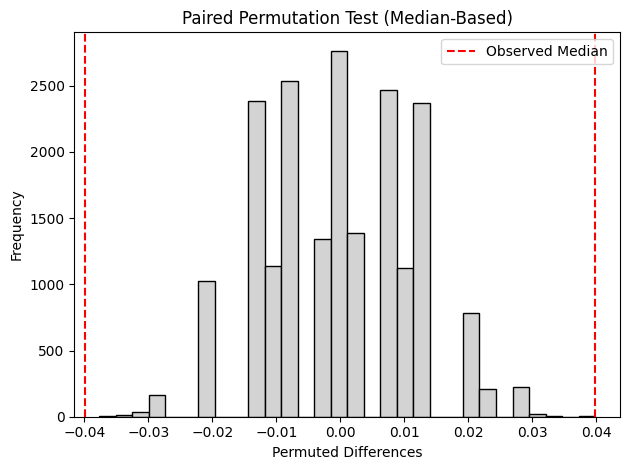

IC[Median-based cFES] Observed: 0.039827, P-value: 0.000050



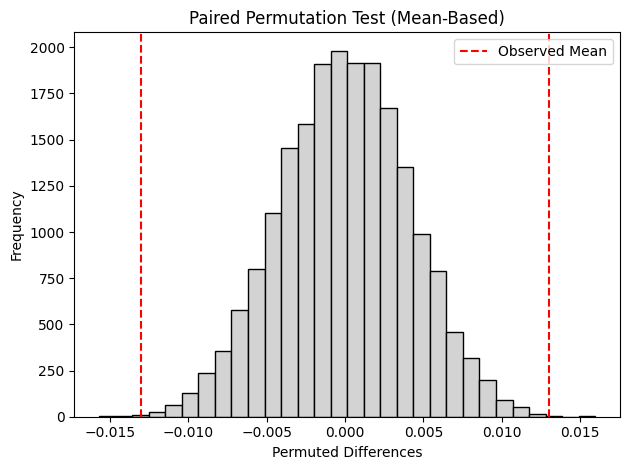

IC[Mean-based cycling] Observed: -0.013004, P-value: 0.000700


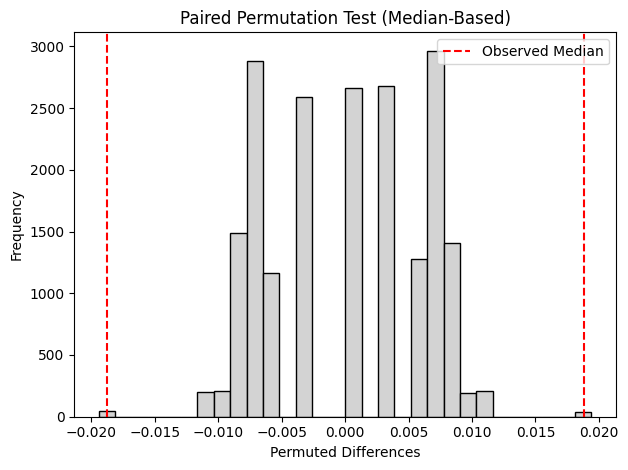

IC[Median-based cycling] Observed: -0.018788, P-value: 0.001650


In [28]:
# # Paired Permutation test with Integration Coefficient values 

# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

# Mean-based permutation test
observed_mean, pval_mean = permutation_test(x_int_SMN_cfes, z_int_SMN_cfes, stat_func=np.mean, n_permutations=20000)
print(f"IC[Mean-based cFES] Observed: {observed_mean:.6f}, P-value: {pval_mean:.6f}")

# Median-based permutation test
observed_median, pval_median = permutation_test(x_int_SMN_cfes, z_int_SMN_cfes, stat_func=np.median, n_permutations=20000)
print(f"IC[Median-based cFES] Observed: {observed_median:.6f}, P-value: {pval_median:.6f}\n")

# Mean-based permutation test
observed_mean, pval_mean = permutation_test(x_int_SMN_c, z_int_SMN_c, stat_func=np.mean, n_permutations=20000)
print(f"IC[Mean-based cycling] Observed: {observed_mean:.6f}, P-value: {pval_mean:.6f}")

# Median-based permutation test
observed_median, pval_median = permutation_test(x_int_SMN_c, z_int_SMN_c, stat_func=np.median, n_permutations=20000)
print(f"IC[Median-based cycling] Observed: {observed_median:.6f}, P-value: {pval_median:.6f}")

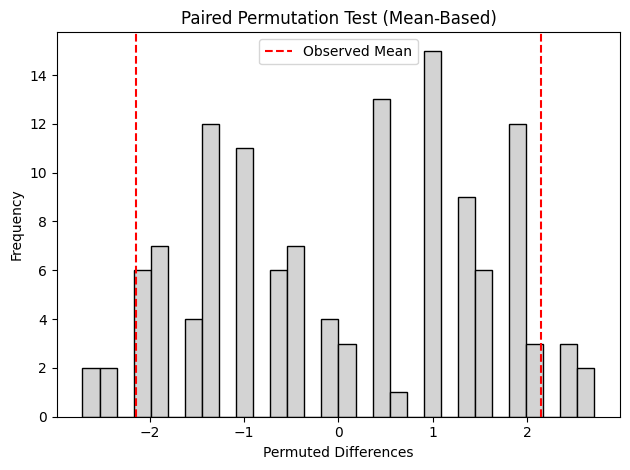

LEMS[Mean-based cFES] Observed: 2.142857, P-value: 0.140625


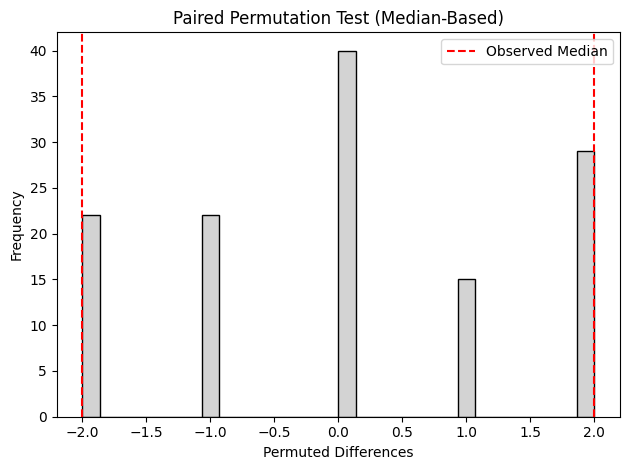

LEMS[Median-based cFES] Observed: 2.000000, P-value: 0.398438


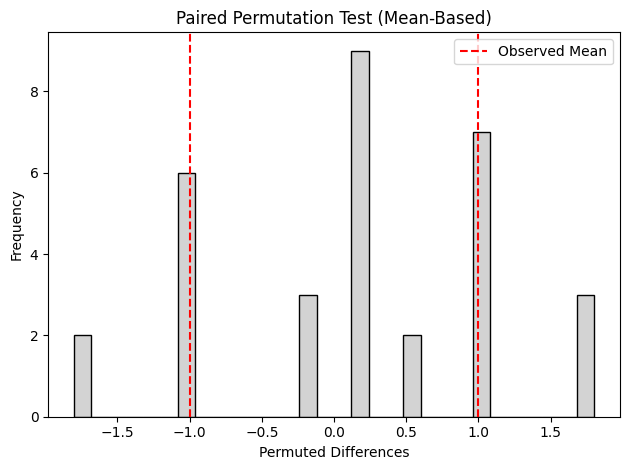

LEMS[Mean-based cycling] Observed: 1.000000, P-value: 0.5625


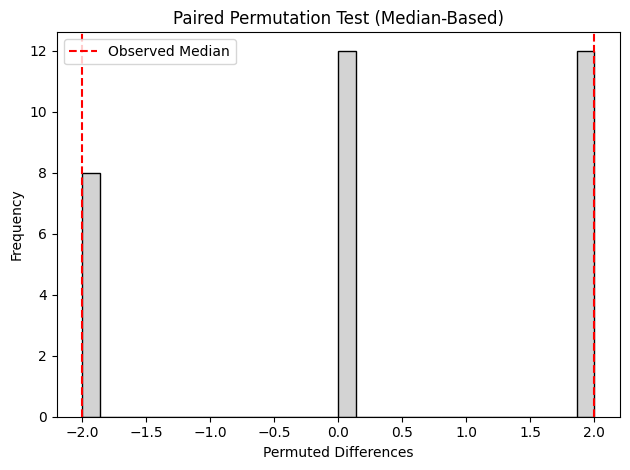

LEMS[Median-based cycling] Observed: 2.000000, P-value: 0.625000


In [32]:
# Paired Permutation test with LEMS values
#LEMS Pre vs Post
observed_mean, pval_mean = permutation_test(cfes_pre_lems, cfes_post_lems, stat_func=np.mean, n_permutations=128)
print(f"LEMS[Mean-based cFES] Observed: {observed_mean:.6f}, P-value: {pval_mean:.6}")

observed_median, pval_median = permutation_test(cfes_pre_lems, cfes_post_lems, stat_func=np.median, n_permutations=128)
print(f"LEMS[Median-based cFES] Observed: {observed_median:.6f}, P-value: {pval_median:.6f}")

observed_mean, pval_mean = permutation_test(c_pre_lems, c_post_lems, stat_func=np.mean, n_permutations=32)
print(f"LEMS[Mean-based cycling] Observed: {observed_mean:.6f}, P-value: {pval_mean:.6}")

observed_median, pval_median = permutation_test(c_pre_lems, c_post_lems, stat_func=np.median, n_permutations=32)
print(f"LEMS[Median-based cycling] Observed: {observed_median:.6f}, P-value: {pval_median:.6f}")


#### 12. Between group analysis ($\Delta$ FES vs $\Delta$ cycling)

#### # of permutations  

Within analysis: $2^n$

Between analysis: $\text{n choose k}$ | $C(n,k)=\frac{n!}{k!(n-k)!}$ | $\binom{n}{k}$



In [34]:
def permutation_test_two_group(change_group1, change_group2, 
                               stat_func=np.mean, n_perms=20000, 
                               random_state=None, plot=True):
    """
    Performs a permutation test comparing two groups of change scores.
    
    Parameters:
    - change_group1, change_group2: Arrays of differences (e.g., post - pre)
    - stat_func: Function to compute statistic (np.mean or np.median)
    - n_perms: Number of permutations
    - random_state: Seed for reproducibility
    - plot: Whether to plot histogram of permutation distribution
    
    Returns:
    - observed_stat: Observed difference
    - p_value: Two-sided p-value
    """
    rng = np.random.default_rng(random_state)

    all_data = np.concatenate([change_group1, change_group2])
    labels = np.array([1] * len(change_group1) + [0] * len(change_group2))

    observed_stat = stat_func(change_group1) - stat_func(change_group2)
    perm_stats = np.empty(n_perms)

    for i in range(n_perms):
        shuffled_labels = rng.permutation(labels)
        perm_group1 = all_data[shuffled_labels == 1]
        perm_group2 = all_data[shuffled_labels == 0]
        perm_stats[i] = stat_func(perm_group1) - stat_func(perm_group2)

    p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))

    if plot:
        plt.hist(perm_stats, bins=30, color='lightgray', edgecolor='black')
        plt.axvline(observed_stat, color='red', linestyle='--', label='Observed')
        plt.axvline(-observed_stat, color='red', linestyle='--')
        plt.title(f"Permutation Test ({stat_func.__name__.capitalize()} Difference)")
        plt.xlabel("Permuted Differences")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

    print(f"Observed {stat_func.__name__} difference: {observed_stat:.6f}")
    print(f"Permutation p-value (two-sided): {p_value:.6f}")
    
    return observed_stat, p_value



In [ ]:
# # === Example usage ===
# pre_cfes = np.array([5, 8,19,43,0,6,5])
# post_cfes = np.array([8,11,17,45,0,14,6])

# pre_c = np.array([0,39,4,9,0])
# post_c = np.array([0,37,6,11,3])

# fes_pre = pre_cfes 
# fes_post = post_cfes 
# cycling_pre = pre_c 
# cycling_post = post_c 

# fes_pre = x_rec_SMN_cfes 
# fes_post = z_rec_SMN_cfes 
# cycling_pre = x_rec_SMN_c 
# cycling_post = z_rec_SMN_c 

# fes_pre = x_int_SMN_cfes 
# fes_post = z_int_SMN_cfes 
# cycling_pre = x_int_SMN_c 
# cycling_post = z_int_SMN_c 

# x_in_SMN z_in_SMN
# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c




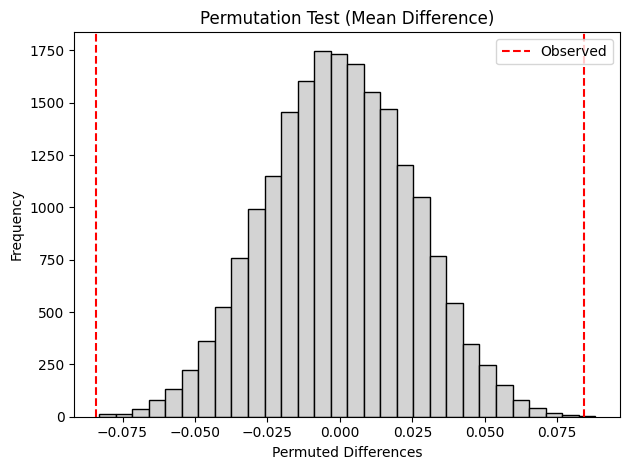

Observed mean difference: 0.084250
Permutation p-value (two-sided): 0.000200


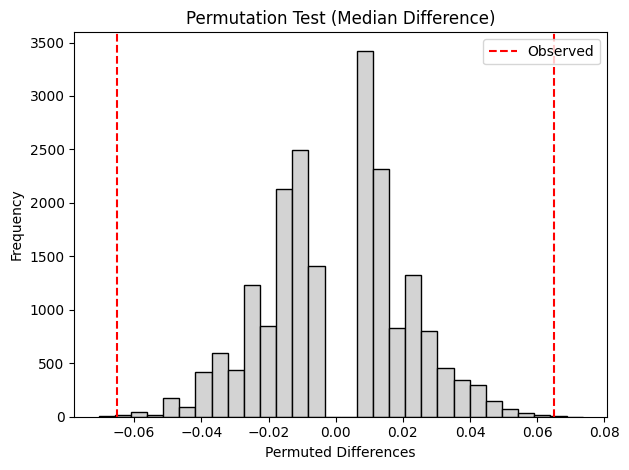

Observed median difference: 0.065126
Permutation p-value (two-sided): 0.000650

RC[Mean-based] Observed: 0.084250, P-value: 0.0002
RC[Median-based] Observed: 0.065126, P-value: 0.00065


In [36]:
# RC Between Analysis cFES vs Cycling

# fes_pre = x_rec_SMN_cfes 
# fes_post = z_rec_SMN_cfes 
# cycling_pre = x_rec_SMN_c 
# cycling_post = z_rec_SMN_c 

delta_fes_rc = z_rec_SMN_cfes - x_rec_SMN_cfes
delta_cycling_rc = z_rec_SMN_c - x_rec_SMN_c

# Run test (mean)
obs_mean, pval_mean = permutation_test_two_group(delta_fes_rc, delta_cycling_rc, 
                                                  stat_func=np.mean, 
                                                  n_perms=20000, 
                                                  random_state=42)

# Optional: Run test (median)
obs_median, pval_median = permutation_test_two_group(delta_fes_rc, delta_cycling_rc, 
                                                      stat_func=np.median, 
                                                      n_perms=20000, 
                                                      random_state=42)

print(f"\nRC[Mean-based] Observed: {obs_mean:.6f}, P-value: {pval_mean:.6}")
print(f"RC[Median-based] Observed: {obs_median:.6f}, P-value: {pval_median:.6}")      
      

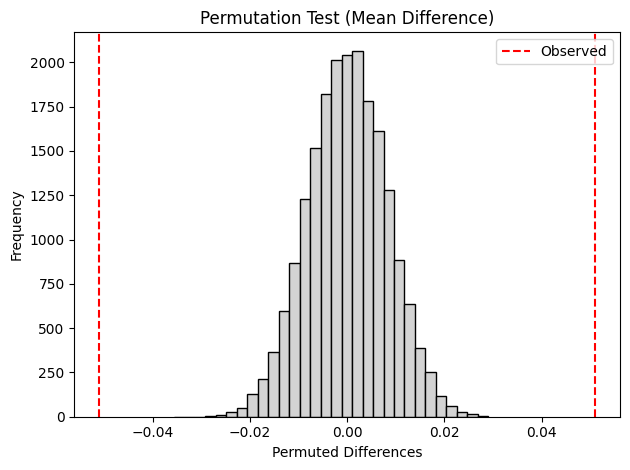

Observed mean difference: 0.051050
Permutation p-value (two-sided): 0.000000


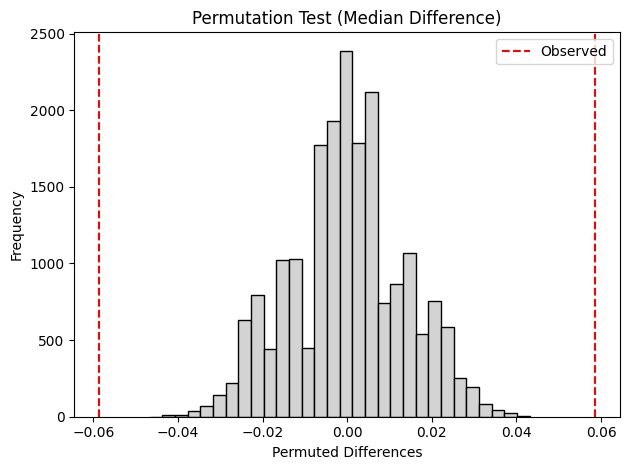

Observed median difference: 0.058615
Permutation p-value (two-sided): 0.000000

IC[Mean-based] Observed: 0.051050, P-value: 0.0
IC[Median-based] Observed: 0.058615, P-value: 0.0


In [37]:
# IC Between Analysis cFES vs Cycling

# fes_pre = x_int_SMN_cfes 
# fes_post = z_int_SMN_cfes 
# cycling_pre = x_int_SMN_c 
# cycling_post = z_int_SMN_c 

delta_fes_ic = z_int_SMN_cfes - x_int_SMN_cfes
delta_cycling_ic = z_int_SMN_c - x_int_SMN_c

# Run test (mean)
obs_mean, pval_mean = permutation_test_two_group(delta_fes_ic, delta_cycling_ic, 
                                                  stat_func=np.mean, 
                                                  n_perms=20000, 
                                                  random_state=42)

# Optional: Run test (median)
obs_median, pval_median = permutation_test_two_group(delta_fes_ic, delta_cycling_ic, 
                                                      stat_func=np.median, 
                                                      n_perms=20000, 
                                                      random_state=42)

print(f"\nIC[Mean-based] Observed: {obs_mean:.6f}, P-value: {pval_mean:.6}")
print(f"IC[Median-based] Observed: {obs_median:.6f}, P-value: {pval_median:.6}")      

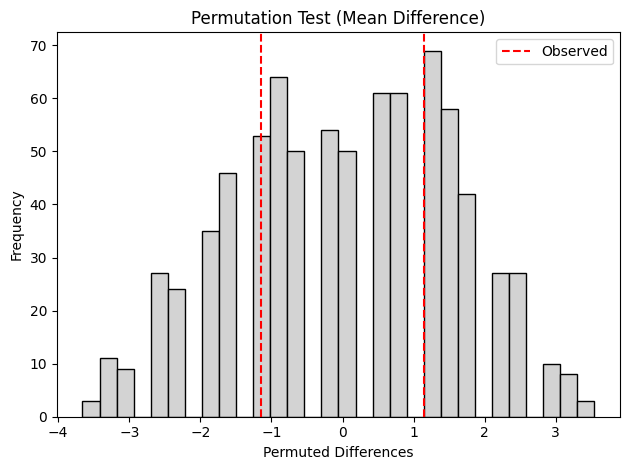

Observed mean difference: 1.142857
Permutation p-value (two-sided): 0.570707


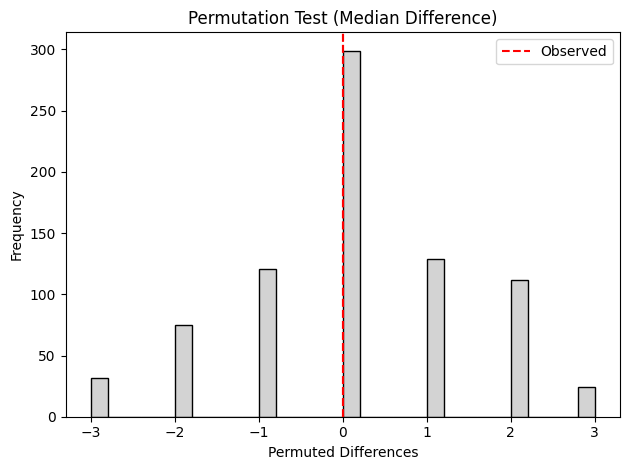

Observed median difference: 0.000000
Permutation p-value (two-sided): 1.000000

LEMS[Mean-based] Observed: 1.142857, P-value: 0.570707
LEMS[Median-based] Observed: 0.000000, P-value: 1.0


In [38]:
# LEMS Between Analysis cFES vs Cycling

# cfes_pre_lems  cfes_post_lems c_pre_lems c_post_lems

delta_fes_lems = cfes_post_lems - cfes_pre_lems
delta_cycling_lems = c_post_lems - c_pre_lems

# Run test (mean)
obs_mean, pval_mean = permutation_test_two_group(delta_fes_lems, delta_cycling_lems, 
                                                  stat_func=np.mean, 
                                                  n_perms=792, 
                                                  random_state=42)

# Optional: (median)
obs_median, pval_median = permutation_test_two_group(delta_fes_lems, delta_cycling_lems, 
                                                      stat_func=np.median, 
                                                      n_perms=792, 
                                                      random_state=42)

print(f"\nLEMS[Mean-based] Observed: {obs_mean:.6f}, P-value: {pval_mean:.6}")
print(f"LEMS[Median-based] Observed: {obs_median:.6f}, P-value: {pval_median:.6}")      

#### 13. Between Analysis: Two-sided permutation - difference in means

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def permutation_test_mean_diff(group1, group2, n_permutations=10000, random_state=42, plot=True):
    """
    Perform a two-sided permutation test on the difference in means between two groups.

    Parameters:
    - group1, group2: Arrays of sample values
    - n_permutations: Number of random permutations to perform (for Monte Carlo approximation)
    - random_state: Seed for reproducibility
    - plot: Whether to display histogram of permutation distribution

    Returns:
    - observed_diff: Observed mean difference
    - p_value: Two-sided permutation p-value
    """
    rng = np.random.default_rng(random_state)

    group1 = np.asarray(group1)
    group2 = np.asarray(group2)

    all_data = np.concatenate([group1, group2])
    n_group1 = len(group1)

    observed_diff = np.mean(group1) - np.mean(group2)
    perm_diffs = []

    for _ in range(n_permutations):
        permuted = rng.permutation(all_data)
        new_group1 = permuted[:n_group1]
        new_group2 = permuted[n_group1:]
        diff = np.mean(new_group1) - np.mean(new_group2)
        perm_diffs.append(diff)

    perm_diffs = np.array(perm_diffs)
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))

    if plot:
        plt.hist(perm_diffs, bins=30, color='lightgray', edgecolor='black')
        plt.axvline(observed_diff, color='red', linestyle='--', label='Observed')
        plt.axvline(-observed_diff, color='red', linestyle='--')
        plt.title("Permutation Test (Mean Difference)")
        plt.xlabel("Mean Differences from Permutations")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

    print(f"Observed difference in mean change: {observed_diff:.4f}")
    print(f"Permutation p-value: {p_value:.4f}")

    return observed_diff, p_value


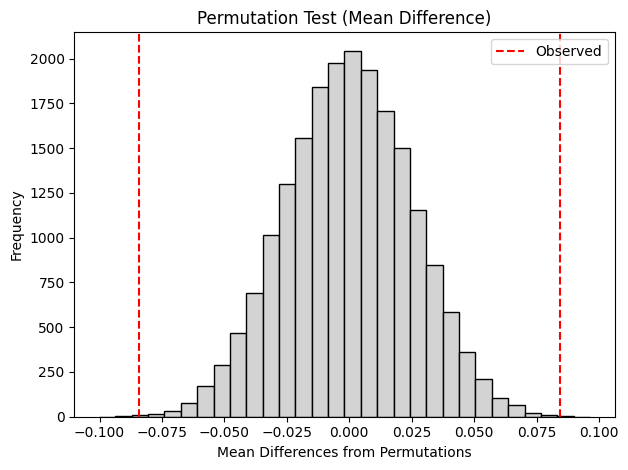

Observed difference in mean change: 0.0842
Permutation p-value: 0.0004


In [41]:
# RC Between Analysis cFES vs Cycling
perm_obs_mean, perm_pval_mean = permutation_test_mean_diff(delta_fes_rc, delta_cycling_rc, n_permutations=20000, random_state=42)

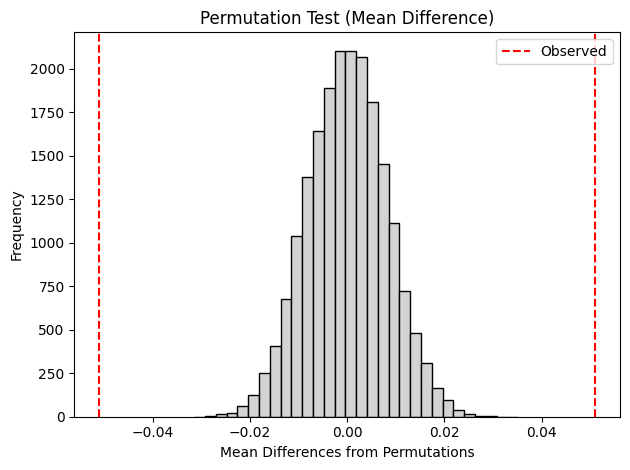

Observed difference in mean change: 0.0511
Permutation p-value: 0.0000


In [42]:
# IC Between Analysis cFES vs Cycling
perm_obs_mean, perm_pval_mean = permutation_test_mean_diff(delta_fes_ic, delta_cycling_ic, n_permutations=20000, random_state=42)

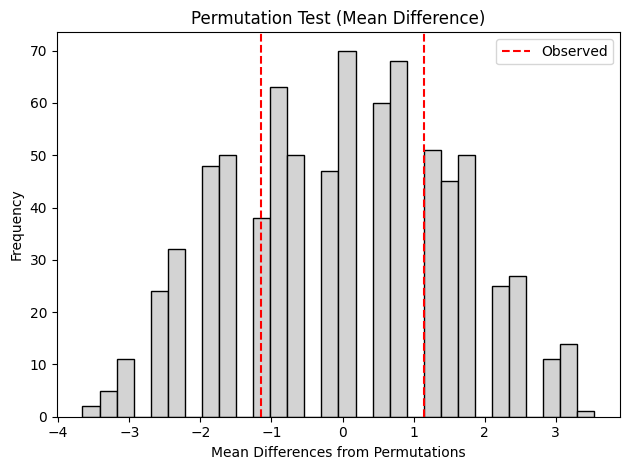

Observed difference in mean change: 1.1429
Permutation p-value: 0.5480


In [43]:
# LEMS Between Analysis cFES vs Cycling
perm_obs_mean, perm_pval_mean = permutation_test_mean_diff(delta_fes_lems, delta_cycling_lems, n_permutations=792, random_state=42)

#### 14. Paired permutation test (region-wise or empiricla p-values)

In [114]:
# # Recruitment Coefficient
# def paired_perm_test_recruitment(s1, s2, nmc):
#     """
#     Proper paired permutation test on recruitment coefs. between two conditions.

#     Parameters:
#     - s1, s2: Arrays of shape (R, S), representing community labels
#              across R regions and S subjects/runs for two paired conditions.
#     - nmc: Number of Monte Carlo permutations.

#     Returns:
#     - p_vals: Array of p-values of shape (R,), one per brain region.
#     """
#     R, S = s1.shape  # R = number of regions, S = number of subjects
#     static_communities = np.zeros((35,))  # Assumes 35 is correct for your recruitment calc

#     # Compute observed recruitment values and difference
#     rec_s1 = communitymeasures.recruitment(s1, static_communities)
#     rec_s2 = communitymeasures.recruitment(s2, static_communities)
#     diff_obs = np.abs(rec_s2 - rec_s1)

#     # Initialize counter for number of times permuted diff >= observed diff
#     exceedances = np.zeros(R)

#     for i in range(nmc):
#         # Randomly flip condition labels for half the subjects (paired permutation)
#         mask = np.random.rand(S) < 0.5

#         # Copy and swap condition labels according to mask
#         perm_s1 = s1.copy()
#         perm_s2 = s2.copy()
#         perm_s1[:, mask], perm_s2[:, mask] = s2[:, mask], s1[:, mask]

#         # Compute recruitment for permuted data
#         rec_perm1 = communitymeasures.recruitment(perm_s1, static_communities)
#         rec_perm2 = communitymeasures.recruitment(perm_s2, static_communities)
#         diff_perm = np.abs(rec_perm2 - rec_perm1)

#         # Track how many times permuted difference >= observed difference
#         exceedances += (diff_perm >= diff_obs)

#         if i % 5000 == 0:
#             print(f"Permutation {i} / {nmc}")

#     # Calculate empirical p-values
#     p_vals = exceedances / nmc
#     return p_vals


# # Integration Coefficient
# def paired_perm_test_integration(s1, s2, nmc):
#     """
#     Paired permutation test on integration scores derived from s1 and s2.

#     Parameters:
#     - s1, s2: Arrays of shape (R, S), community labels (e.g., pre/post or condition1/2)
#     - nmc: Number of Monte Carlo permutations

#     Returns:
#     - p_vals: Array of p-values (R,)
#     """
#     assert s1.shape == s2.shape, "s1 and s2 must have the same shape"
#     R, S = s1.shape  # R = number of regions, S = number of samples/subjects
#     static_communities = np.zeros((35,))  # SMN region

#     # Observed integration differences
#     int_s1 = communitymeasures.integration(s1, static_communities)
#     int_s2 = communitymeasures.integration(s2, static_communities)
#     observed_diff = np.abs(int_s2 - int_s1)

#     # Initialize permutation exceedance counts
#     exceed_count = np.zeros(R)

#     for i in range(nmc):
#         # Flip s1 and s2 values randomly per column (subject/sample)
#         flip_mask = np.random.rand(S) < 0.5  # Boolean mask of length S
#         perm_s1 = s1.copy()
#         perm_s2 = s2.copy()

#         # Swap labels where flip_mask is True (paired permutation)
#         perm_s1[:, flip_mask], perm_s2[:, flip_mask] = s2[:, flip_mask], s1[:, flip_mask]

#         # Compute integration measures for permuted data
#         int_perm_s1 = communitymeasures.integration(perm_s1, static_communities)
#         int_perm_s2 = communitymeasures.integration(perm_s2, static_communities)
#         perm_diff = np.abs(int_perm_s2 - int_perm_s1)

#         # Count how many times permuted diff >= observed diff
#         exceed_count += perm_diff >= observed_diff

#         if i % 5000 == 0:
#             print(f'Permutation #{i}')

#     # Compute two-sided p-values
#     p_vals = exceed_count / nmc
#     return p_vals

# # Allegience Matrix
# def paired_perm_test_allegiance(s1, s2, nmc):
#     """
#     Paired permutation test on allegiance scores derived from s1 and s2.

#     Parameters:
#     - s1, s2: Arrays of shape (R, S), community labels (e.g., pre/post or condition1/2)
#     - nmc: Number of Monte Carlo permutations

#     Returns:
#     - p_vals: Array of p-values (R, R) for each pair of regions
#     """
#     assert s1.shape == s2.shape, "s1 and s2 must have the same shape"
#     R, S = s1.shape  # R = number of regions, S = number of samples/subjects

#     # Compute observed allegiance matrices and difference
#     alg_s1 = communitymeasures.allegiance(s1)  # Shape (R, R)
#     alg_s2 = communitymeasures.allegiance(s2)  # Shape (R, R)
#     observed_diff = np.abs(alg_s2 - alg_s1)

#     # Initialize exceedance count matrix
#     exceed_count = np.zeros((R, R))

#     for i in range(nmc):
#         # Paired permutation via random column swaps
#         flip_mask = np.random.rand(S) < 0.5
#         perm_s1 = s1.copy()
#         perm_s2 = s2.copy()
#         perm_s1[:, flip_mask], perm_s2[:, flip_mask] = s2[:, flip_mask], s1[:, flip_mask]

#         # Compute permuted allegiance and difference
#         alg_perm_s1 = communitymeasures.allegiance(perm_s1)
#         alg_perm_s2 = communitymeasures.allegiance(perm_s2)
#         perm_diff = np.abs(alg_perm_s2 - alg_perm_s1)

#         # Update count matrix
#         exceed_count += perm_diff >= observed_diff

#         if i % 5000 == 0:
#             print(f'Permutation #{i}')

#     # Compute p-values
#     p_vals = exceed_count / nmc
#     return p_vals



In [115]:
# cl_pre_SMN_cfes, cl_post_SMN_cfes
# cl_pre_SMN_c, cl_post_SMN_c

# x_alg_SMN_cfes, z_alg_SMN_cfes
# x_alg_SMN_c, z_alg_SMN_c

# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

In [116]:
# rec_pvalue_cfes = paired_perm_test_recruitment(cl_pre_SMN_cfes, cl_post_SMN_cfes, nmc=20000)
# int_pvalue_cfes = paired_perm_test_integration(cl_pre_SMN_cfes, cl_post_SMN_cfes, nmc=20000)

# rec_pvalue_c = paired_perm_test_recruitment(cl_pre_SMN_c, cl_post_SMN_c, nmc=20000)
# int_pvalue_c = paired_perm_test_integration(cl_pre_SMN_c, cl_post_SMN_c, nmc=20000)

In [117]:
# print(f"\nRecruitment p-value cFES shape: {rec_pvalue_cfes.shape}")
# print(f"Integration p-value cFES shape: {int_pvalue_cfes.shape}\n")

# print(f"Recruitment p-value cycling shape: {rec_pvalue_c.shape}")
# print(f"Integration p-value cycling shape: {int_pvalue_c.shape}")

In [118]:
# alg_pvalue_cfes = paired_perm_test_allegiance(cl_pre_SMN_cfes, cl_post_SMN_cfes, nmc=20000)
# alg_pvalue_c = paired_perm_test_allegiance(cl_pre_SMN_c, cl_post_SMN_c, nmc=20000)

# print(f"Allegience p-value cFES shape: {alg_pvalue_cfes.shape}")
# print(f"Allegience p-value cycling shape: {alg_pvalue_c.shape}")

In [119]:
# rec_pvalue_cfes
# int_pvalue_cfes
# rec_pvalue_c
# int_pvalue_c
# alg_pvalue_cfes
# alg_pvalue_c

#### 15. Bar plots of LEMS, RC & IC 

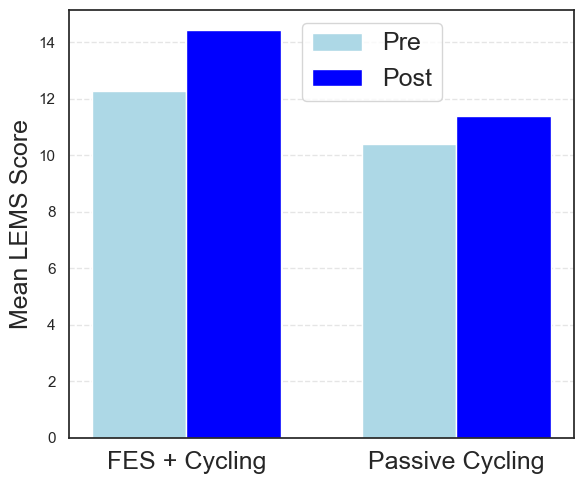

In [120]:
# Compute mean values
pre_values  = [np.mean(cfes_pre_lems), np.mean(c_pre_lems)]
post_values = [np.mean(cfes_post_lems), np.mean(c_post_lems)]

# Group labels
labels = ['FES + Cycling', 'Passive Cycling']
x = np.arange(len(labels))  # [0, 1]
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width/2, pre_values, width, label='Pre', color='lightblue')
ax.bar(x + width/2, post_values, width, label='Post', color='blue')

# Labels and styling
ax.set_ylabel('Mean LEMS Score', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18)
ax.legend(loc='upper center', fontsize=18, bbox_to_anchor=(0.6, 1.0), ncol=1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save or show
plt.savefig('/Users/ismaila/Desktop/bar_plot_lems_grouped_by_intervention.png', dpi=300)
plt.show()


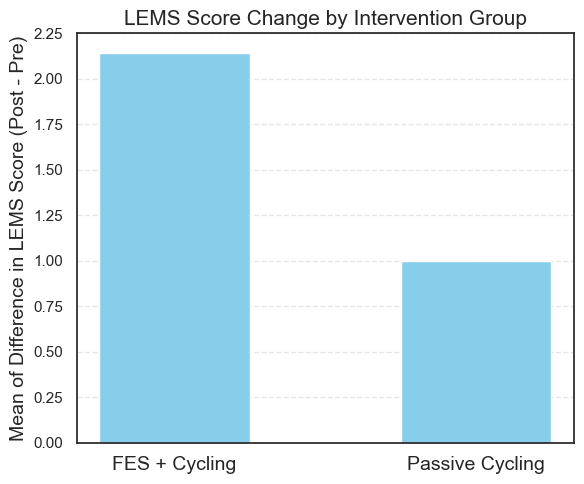

In [171]:
# Diff of LEMS scores

# Change scores: Post - Pre
delta_cfes_lems = cfes_post_lems - cfes_pre_lems
delta_cycling_lems = c_post_lems - c_pre_lems

# Mean change
change_means = [np.mean(delta_cfes_lems), np.mean(delta_cycling_lems)]

# Plot setup
labels = ['FES + Cycling', 'Passive Cycling']
x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x, change_means, width, color='skyblue')

# Styling
ax.set_ylabel('Mean of Difference in LEMS Score (Post - Pre)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
plt.title('LEMS Score Change by Intervention Group', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save or show
plt.savefig('/Users/ismaila/Desktop/bar_plot_lems_change_scores.png', dpi=300)
plt.show()


In [173]:
# #LEMS scores

# # Data
# change_data = [delta_cfes_lems, delta_cycling_lems]
# labels = ['FES + Cycling', 'Passive Cycling']

# # Plot
# fig, ax = plt.subplots(figsize=(6, 5))
# box = ax.boxplot(change_data, patch_artist=True, labels=labels)

# # Customize box color
# colors = ['skyblue', 'lightgreen']
# for patch, color in zip(box['boxes'], colors):
#     patch.set_facecolor(color)

# # Styling
# ax.set_ylabel('Change in LEMS Score (Post - Pre)', fontsize=14)
# ax.set_title('Box Plot of LEMS Score Change', fontsize=15)
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.tight_layout()

# # Save or show
# plt.savefig('/Users/ismaila/Desktop/box_plot_lems_change.png', dpi=300)
# plt.show()


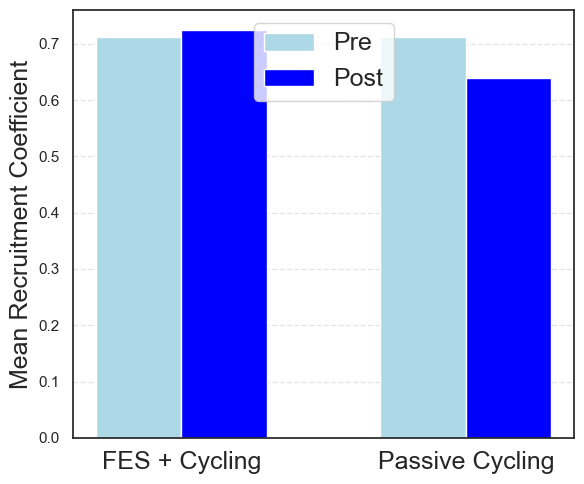

In [123]:
# Recruitment coefficient  
# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c


# Compute means
pre_vals  = [np.mean(x_rec_SMN_cfes), np.mean(x_rec_SMN_c)]
post_vals = [np.mean(z_rec_SMN_cfes), np.mean(z_rec_SMN_c)]

# Labels and positions
labels = ['cFES', 'Passive Cycling']
x = np.arange(len(labels))  # [0, 1]
width = 0.3

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width/2, pre_vals, width, label='Pre', color='lightblue')
ax.bar(x + width/2, post_vals, width, label='Post', color='blue')

# Axis and styling
ax.set_ylabel('Mean Recruitment Coefficient', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=1, fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show or save
plt.savefig('/Users/ismaila/Desktop/recruitment_coeff_grouped_plot.png', dpi=300)

plt.show()


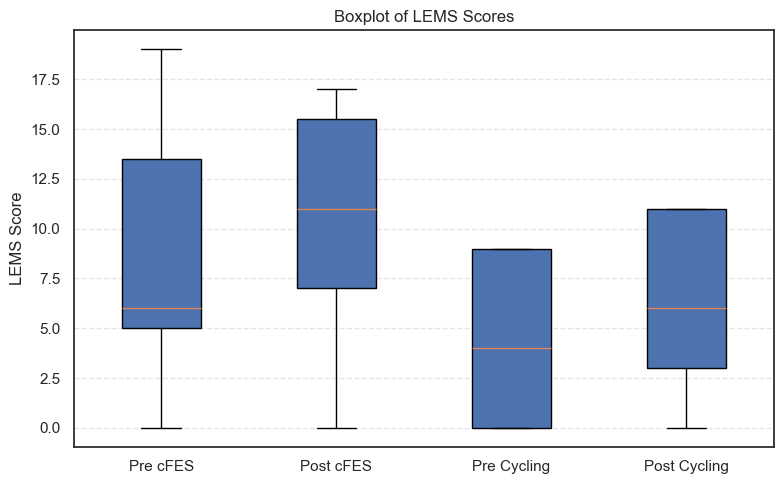

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Raw data
pre_cFES_vals  = [5, 8, 19, 43, 0, 6, 5]
post_cFES_vals = [8, 11, 17, 45, 0, 14, 6]
pre_c_vals     = [0, 39, 4, 9, 0]
post_c_vals    = [0, 37, 6, 11, 3]

# Group the data
data = [pre_cFES_vals, post_cFES_vals, pre_c_vals, post_c_vals]
labels = ['Pre cFES', 'Post cFES', 'Pre Cycling', 'Post Cycling']

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(data, labels=labels, patch_artist=True, showfliers=True)

# Aesthetics
ax.set_title('Boxplot of LEMS Scores')
ax.set_ylabel('LEMS Score')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show or save the plot
plt.savefig('boxplot_lems_summary.png', dpi=300)
plt.show()


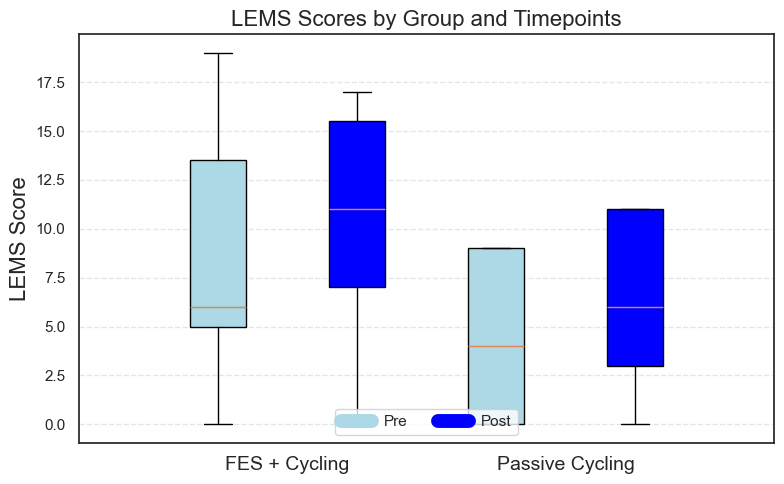

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Data
cfes_pre_lems  = np.array([5, 8, 19, 43, 0, 6, 5])
cfes_post_lems = np.array([8, 11, 17, 45, 0, 14, 6])
c_pre_lems     = np.array([0, 39, 4, 9, 0])
c_post_lems    = np.array([0, 37, 6, 11, 3])

# Organized data dictionary
data = {
    'FES + Cycling': {
        'Pre': cfes_pre_lems,
        'Post': cfes_post_lems
    },
    'Passive Cycling': {
        'Pre': c_pre_lems,
        'Post': c_post_lems
    }
}

# Prepare data for boxplot
box_data = []
group_labels = []
colors = []
positions = []

group_names = list(data.keys())
offsets = [0, 1]  # positions for FES + Cycling and Passive Cycling
width = 0.25

for i, group in enumerate(group_names):
    pre_data = data[group]['Pre']
    post_data = data[group]['Post']

    # Append data
    box_data.append(pre_data)
    box_data.append(post_data)
    group_labels.extend([f'{group}\nPre', f'{group}\nPost'])
    colors.extend(['lightblue', 'blue'])
    positions.extend([offsets[i] - width, offsets[i] + width])

# Create boxplot
fig, ax = plt.subplots(figsize=(8, 5))
box = ax.boxplot(box_data, positions=positions, patch_artist=True, widths=0.2, showfliers=False)

# Apply color
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add mean + std errorbars
for pos, vals in zip(positions, box_data):
    mean = np.mean(vals)
    std = np.std(vals)
    ax.errorbar(pos, mean, yerr=std, fmt='o', color='black', capsize=5)

# Aesthetics
ax.set_ylabel('LEMS Score', fontsize=16)
ax.set_xticks(offsets)
ax.set_xticklabels(group_names, fontsize=14)
ax.set_title('LEMS Scores by Group and Timepoints', fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
legend_elements = [
    plt.Line2D([0], [0], color='lightblue', lw=10, label='Pre'),
    plt.Line2D([0], [0], color='blue', lw=10, label='Post'),
]
ax.legend(handles=legend_elements, loc='lower center', ncol=2)

# Final touches
plt.tight_layout()
plt.savefig('/Users/ismaila/Desktop/lems_boxplot_with_std.png', dpi=300)
plt.show()


/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_21717/3910494937.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=labels, y=all_data, palette='pastel', showmeans=True,


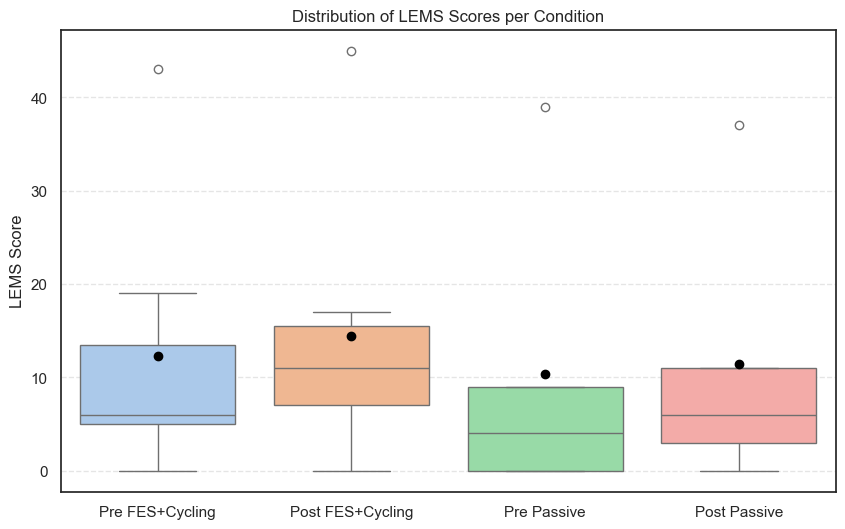

In [185]:
# Raw data
data = {
    'Pre FES+Cycling': [5, 8, 19, 43, 0, 6, 5],
    'Post FES+Cycling': [8, 11, 17, 45, 0, 14, 6],
    'Pre Passive': [0, 39, 4, 9, 0],
    'Post Passive': [0, 37, 6, 11, 3]
}

# Convert to long format
all_data = []
labels = []
for key, values in data.items():
    all_data.extend(values)
    labels.extend([key] * len(values))

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels, y=all_data, palette='pastel', showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"})
plt.ylabel('LEMS Score')
plt.title('Distribution of LEMS Scores per Condition')
plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.tight_layout()
plt.show()


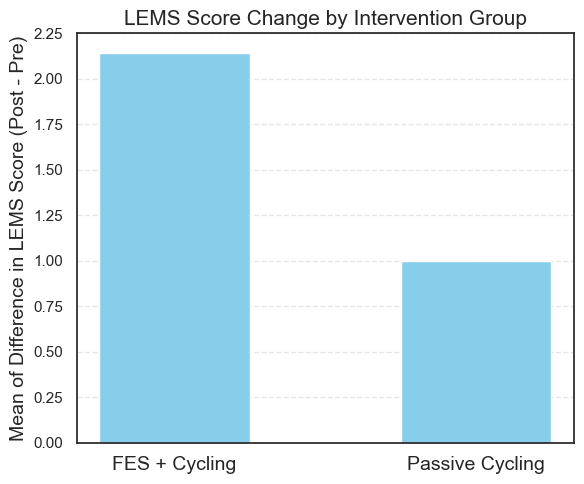

In [187]:
# Diff of LEMS scores

# Change scores: Post - Pre
delta_cfes_lems = cfes_post_lems - cfes_pre_lems
delta_cycling_lems = c_post_lems - c_pre_lems

# Mean change
change_means = [np.mean(delta_cfes_lems), np.mean(delta_cycling_lems)]

# Plot setup
labels = ['FES + Cycling', 'Passive Cycling']
x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x, change_means, width, color='skyblue')

# Styling
ax.set_ylabel('Mean of Difference in LEMS Score (Post - Pre)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
plt.title('LEMS Score Change by Intervention Group', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save or show
plt.savefig('/Users/ismaila/Desktop/bar_plot_lems_change_scores.png', dpi=300)
plt.show()


/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_21717/4010988738.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=labels, y=data, palette='Blues', showmeans=True, width=0.3,


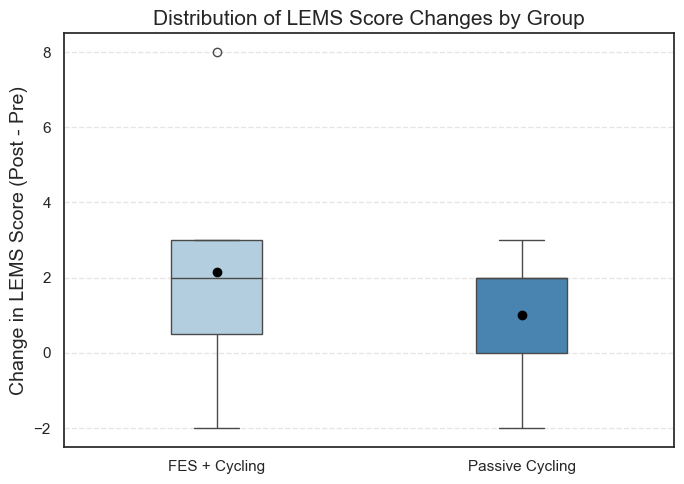

In [189]:
# Data
cfes_pre_lems  = np.array([5, 8, 19, 43, 0, 6, 5])
cfes_post_lems = np.array([8, 11, 17, 45, 0, 14, 6])
c_pre_lems     = np.array([0, 39, 4, 9, 0])
c_post_lems    = np.array([0, 37, 6, 11, 3])

# Compute delta
delta_cfes_lems = cfes_post_lems - cfes_pre_lems
delta_cycling_lems = c_post_lems - c_pre_lems

# Flatten for boxplot
data = np.concatenate([delta_cfes_lems, delta_cycling_lems])
labels = ['FES + Cycling'] * len(delta_cfes_lems) + ['Passive Cycling'] * len(delta_cycling_lems)

# Create boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x=labels, y=data, palette='Blues', showmeans=True, width=0.3,
            meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"})

# Aesthetics
plt.ylabel('Change in LEMS Score (Post - Pre)', fontsize=14)
plt.title('Distribution of LEMS Score Changes by Group', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save or show
plt.savefig('/Users/ismaila/Desktop/boxplot_lems_change_scores.png', dpi=300)
plt.show()


In [ ]:
# Pre/post FES + Cycling Recruitment Coeffieicent
# x_rec_SMN_cfes, z_rec_SMN_cfes x_rec_SMN_c  z_rec_SMN_c 

# Pre/post Passive Cycling Integration Coeffieicent
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

In [196]:
# def print_array(name, array):
#     formatted = ', '.join([f"{val:.4f}" for val in array])
#     print(f"{name} = np.array([{formatted}])")

# # Print all arrays
# print_array("x_rec_SMN_cfes", x_rec_SMN_cfes)
# print_array("z_rec_SMN_cfes", z_rec_SMN_cfes)
# print_array("\nx_rec_SMN_c", x_rec_SMN_c)
# print_array("z_rec_SMN_c", z_rec_SMN_c)
# print_array("\nx_int_SMN_cfes", x_int_SMN_cfes)
# print_array("z_int_SMN_cfes", z_int_SMN_cfes)
# print_array("\nx_int_SMN_c", x_int_SMN_c)
# print_array("z_int_SMN_c", z_int_SMN_c)

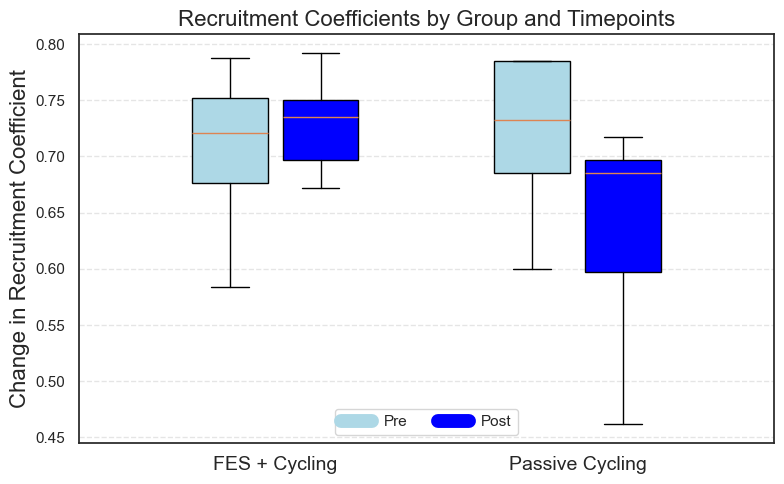

In [169]:
# Example data arrays (replace these with your actual data)
# x_rec_SMN_cfes, z_rec_SMN_cfes = pre/post FES+Cycling
# x_rec_SMN_c,    z_rec_SMN_c    = pre/post Passive Cycling

data = {
    'FES + Cycling': {
        'Pre': x_rec_SMN_cfes,
        'Post': z_rec_SMN_cfes
    },
    'Passive Cycling': {
        'Pre': x_rec_SMN_c,
        'Post': z_rec_SMN_c
    }
}

# Flatten into lists for boxplot
box_data = []
group_labels = []
colors = []
positions = []

group_names = list(data.keys())
offset = 0
width = 0.3
for i, group in enumerate(group_names):
    pre_data = data[group]['Pre']
    post_data = data[group]['Post']

    # Append data
    box_data.extend([pre_data, post_data])
    group_labels.extend([f'{group}\nPre', f'{group}\nPost'])
    colors.extend(['lightblue', 'blue'])
    positions.extend([offset - width/2, offset + width/2])
    offset += 1

# Create boxplot
fig, ax = plt.subplots(figsize=(8, 5))
box = ax.boxplot(box_data, positions=positions, patch_artist=True, widths=0.25, showfliers=False)

# Color each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# # Add error bars (standard deviation as red ticks)
# for i, vals in enumerate(box_data):
#     std = np.std(vals)
#     mean = np.mean(vals)
#     ax.errorbar(positions[i], mean, yerr=std, fmt='o', color='black', capsize=5)

# Aesthetics
ax.set_ylabel('Change in Recruitment Coefficient', fontsize=16)
ax.set_xticks([i for i in range(len(group_names))])
ax.set_xticklabels(group_names, fontsize=14)
ax.set_title('Recruitment Coefficients by Group and Timepoints', fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
legend_elements = [
    plt.Line2D([0], [0], color='lightblue', lw=10, label='Pre'),
    plt.Line2D([0], [0], color='blue', lw=10, label='Post'),
]
ax.legend(handles=legend_elements, loc='lower center',ncol=2)

plt.tight_layout()
plt.savefig('/Users/ismaila/Desktop/recruitment_coeff_boxplot_with_std.png', dpi=300)
plt.show()


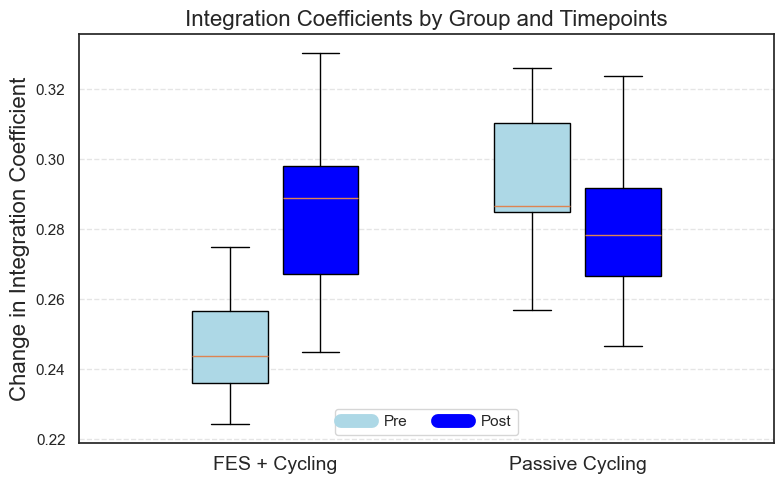

In [170]:
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

data = {
    'FES + Cycling': {
        'Pre': x_int_SMN_cfes,
        'Post': z_int_SMN_cfes
    },
    'Passive Cycling': {
        'Pre': x_int_SMN_c,
        'Post': z_int_SMN_c
    }
}

# Flatten into lists for boxplot
box_data = []
group_labels = []
colors = []
positions = []

group_names = list(data.keys())
offset = 0
width = 0.3
for i, group in enumerate(group_names):
    pre_data = data[group]['Pre']
    post_data = data[group]['Post']

    # Append data
    box_data.extend([pre_data, post_data])
    group_labels.extend([f'{group}\nPre', f'{group}\nPost'])
    colors.extend(['lightblue', 'blue'])
    positions.extend([offset - width/2, offset + width/2])
    offset += 1

# Create boxplot
fig, ax = plt.subplots(figsize=(8, 5))
box = ax.boxplot(box_data, positions=positions, patch_artist=True, widths=0.25, showfliers=False)

# Color each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# # Add error bars (standard deviation as red ticks)
# for i, vals in enumerate(box_data):
#     std = np.std(vals)
#     mean = np.mean(vals)
#     ax.errorbar(positions[i], mean, yerr=std, fmt='o', color='black', capsize=5)

# Aesthetics
ax.set_ylabel('Change in Integration Coefficient', fontsize=16)
ax.set_xticks([i for i in range(len(group_names))])
ax.set_xticklabels(group_names, fontsize=14)
ax.set_title('Integration Coefficients by Group and Timepoints', fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
legend_elements = [
    plt.Line2D([0], [0], color='lightblue', lw=10, label='Pre'),
    plt.Line2D([0], [0], color='blue', lw=10, label='Post'),
]
ax.legend(handles=legend_elements, loc='lower center',ncol=2)

plt.tight_layout()
# plt.savefig('/Users/ismaila/Desktop/recruitment_coeff_boxplot_with_std.png', dpi=300)
plt.show()


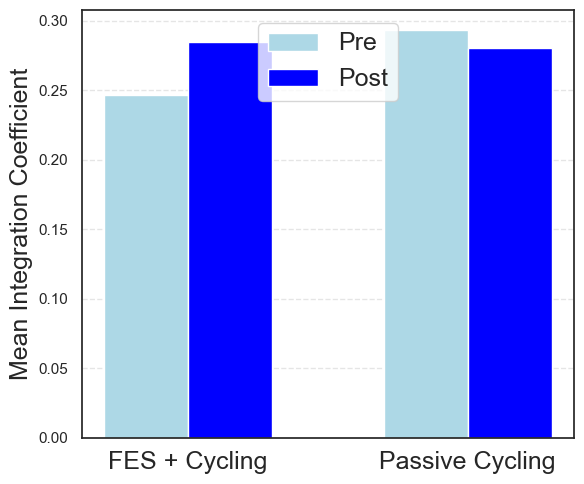

In [124]:
# # Integration coefficient  

# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

# Compute means
pre_vals  = [np.mean(x_int_SMN_cfes), np.mean(x_int_SMN_c)]
post_vals = [np.mean(z_int_SMN_cfes), np.mean(z_int_SMN_c)]

# Labels and positions
labels = ['FES + Cycling', 'Passive Cycling']
x = np.arange(len(labels))
width = 0.3

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width/2, pre_vals, width, label='Pre', color='lightblue')
ax.bar(x + width/2, post_vals, width, label='Post', color='blue')

# Axis and styling
ax.set_ylabel('Mean Integration Coefficient', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=1, fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show or save
plt.savefig('/Users/ismaila/Desktop/integration_coeff_grouped_plot.png', dpi=300)
plt.show()


#### 16. Show scattered plot of PreFES vs PostFES recruitment and integration coefficients.  

In [ ]:
# Between subject analysis

# Previous permutation test

def perm_test_integration(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    int_s1 = communitymeasures.integration(s1, static_communities)
    int_s2 = communitymeasures.integration(s2, static_communities)
    diff = np.abs(int_s2 - int_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        int_sp1 = communitymeasures.integration(sp1, static_communities)
        int_sp2 = communitymeasures.integration(sp2, static_communities)
        k += diff < np.abs(int_sp2 - int_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

def perm_test_recruitment(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    rec_s1 = communitymeasures.recruitment(s1, static_communities)
    rec_s2 = communitymeasures.recruitment(s2, static_communities)
    diff = np.abs(rec_s2 - rec_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
        rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
        k += diff < np.abs(rec_sp2 - rec_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc


def perm_test_allegiance(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    diff = np.abs(alg_s2 - alg_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T 
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        k += diff < np.abs(alg_sp2 - alg_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

 
# run for a given permutation number (nmc) var_s1 var_s2 var_s3

# int_pvalue_cfes = perm_test_integration(S_g1, S_g2, nmc=100)  
# int_pvalue_c = perm_test_integration(S_g1, S_g3, nmc=20000)  
# rec_pvalue_cfes = perm_test_recruitment(S_g1, S_g2, nmc=100)  
# rec_pvalue_c = perm_test_recruitment(S_g1, S_g3, nmc=20000)  

# rec_pvalue_cfes
# int_pvalue_cfes
# rec_pvalue_c
# int_pvalue_c
# alg_pvalue_cfes
# alg_pvalue_c
# lems_pvalue_cFES
# lems_pvalue_c

# rec_pvalue_delta
# int_pvalue_delta
# alg_pvalue_delta
# lems_pvalue_delta

In [244]:
# Pre/post FES + Cycling Recruitment Coeffieicent
# x_rec_SMN_cfes, z_rec_SMN_cfes x_rec_SMN_c  z_rec_SMN_c 

# Pre/post Passive Cycling Integration Coeffieicent
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c


# def perm_test_rc_delta(x1, x2, y1, y2, nmc=1000):
#     """
#     Permutation test comparing changes in recruitment coefficient (post - pre) between
#     cFES (x2 - x1) and passive cycling (y2 - y1) groups. Assumes independent groups.
    
#     Parameters:
#     - x1, x2: Pre/post RC values for cFES (shape: [n_subjects])
#     - y1, y2: Pre/post RC values for passive cycling (shape: [n_subjects])
#     - nmc: Number of Monte Carlo permutations

#     Returns:
#     - p_vals: P-value vector (shape: [n_subjects])
#     """
    
#     # Calculate changes
#     delta_cf = np.array(x2) - np.array(x1)  # shape (35,)
#     delta_pc = np.array(y2) - np.array(y1)  # shape (35,)
    
#     # Stack into a combined array for permutation
#     data = np.stack([delta_cf, delta_pc], axis=0)  # shape (2, 35)
    
#     # Observed absolute difference
#     observed_diff = np.abs(delta_cf - delta_pc)  # shape (35,)
    
#     # Initialize count for p-values
#     k = np.zeros_like(observed_diff)
    
#     for i in range(nmc):
#         # Randomly flip condition labels (swap rows element-wise with 50% chance)
#         flip_mask = np.random.rand(*data.shape) < 0.5
#         permuted_data = np.where(flip_mask, data[::-1], data)
        
#         # Calculate permuted group difference
#         diff_perm = np.abs(permuted_data[0] - permuted_data[1])
        
#         # Count where permuted difference >= observed difference
#         k += diff_perm >= observed_diff
        
#         if i % 100 == 0:
#             print(f'Permutation #{i}')
    
#     # p-value = proportion of permutations with equal or greater difference
#     p_vals = k / nmc
    
#     return p_vals



def perm_test_rc_ic_delta(delta_cfes_rec, delta_cycling_rec, nmc=1000):
    """
    Permutation test for independent changes in recruitment coefficient between
    FES + Cycling and Passive Cycling groups.

    Parameters:
    - delta_cfes: np.ndarray, change scores for FES + Cycling (shape: [n_subjects])
    - delta_cycling: np.ndarray, change scores for Passive Cycling (shape: [n_subjects])
    - nmc: int, number of Monte Carlo permutations

    Returns:
    - pvals: np.ndarray of shape [n_subjects], empirical p-values
    """
    delta_cfes = np.array(delta_cfes_rec)
    delta_cycling = np.array(delta_cycling_rec)

    assert delta_cfes.shape == delta_cycling.shape, "Both groups must have same shape"
    n = delta_cfes.shape[0]

    observed_diff = np.abs(delta_cfes - delta_cycling)
    k = np.zeros(n)

    for i in range(nmc):
        # Label flipping for independent samples
        combined = np.stack((delta_cfes, delta_cycling), axis=1)
        flip = np.random.rand(n) < 0.5
        perm1 = np.where(flip, combined[:, 0], combined[:, 1])
        perm2 = np.where(flip, combined[:, 1], combined[:, 0])
        perm_diff = np.abs(perm1 - perm2)

        k += observed_diff < perm_diff

        if i % 10 == 0:
            print(f'permutation #: {i}')

    pvals = k / nmc
    return pvals



def perm_test_alg_matrix(delta_cfes, delta_cycling, nmc=1000):
    """
    Permutation test for independent changes in recruitment coefficient matrices between
    FES + Cycling and Passive Cycling groups.

    Parameters:
    - delta_cfes: np.ndarray, change score matrix for FES + Cycling (shape: [n, n])
    - delta_cycling: np.ndarray, change score matrix for Passive Cycling (shape: [n, n])
    - nmc: int, number of Monte Carlo permutations

    Returns:
    - pvals: np.ndarray of shape [n, n], empirical p-values
    """
    delta_cfes = np.array(delta_cfes)
    delta_cycling = np.array(delta_cycling)

    assert delta_cfes.shape == delta_cycling.shape, "Both matrices must have same shape"
    n, _ = delta_cfes.shape

    observed_diff = np.abs(delta_cfes - delta_cycling)
    k = np.zeros((n, n))

    for i in range(nmc):
        # Randomly flip each cell independently
        flip_mask = np.random.rand(n, n) < 0.5
        perm1 = np.where(flip_mask, delta_cfes, delta_cycling)
        perm2 = np.where(flip_mask, delta_cycling, delta_cfes)
        perm_diff = np.abs(perm1 - perm2)

        k += observed_diff < perm_diff

        if i % 10 == 0:
            print(f'permutation #: {i}')

    pvals = k / nmc
    return pvals



def perm_test_lems_delta(delta_cfes_rec, delta_cycling_rec, nmc=1000):
    """
    Permutation test for independent changes in recruitment or integration coefficients 
    between FES + Cycling and Passive Cycling groups (unequal group sizes allowed).

    Parameters:
    - delta_cfes_rec: np.ndarray, change scores for FES + Cycling (shape: [n1])
    - delta_cycling_rec: np.ndarray, change scores for Passive Cycling (shape: [n2])
    - nmc: int, number of Monte Carlo permutations

    Returns:
    - pval: float, empirical p-value
    """
    delta_cfes = np.array(delta_cfes_rec)
    delta_cycling = np.array(delta_cycling_rec)

    n1 = delta_cfes.shape[0]
    n2 = delta_cycling.shape[0]

    # Observed difference in group means
    observed_diff = np.abs(np.mean(delta_cfes) - np.mean(delta_cycling))

    # Combine data
    combined = np.concatenate([delta_cfes, delta_cycling])
    k = 0  # count of permutations with greater or equal difference

    for i in range(nmc):
        permuted = np.random.permutation(combined)
        perm_group1 = permuted[:n1]
        perm_group2 = permuted[n1:]

        perm_diff = np.abs(np.mean(perm_group1) - np.mean(perm_group2))

        if perm_diff >= observed_diff:
            k += 1

        if i % 10 == 0:
            print(f'permutation #: {i}')

    # Return empirical p-value
    pval = k / nmc
    return pval





In [245]:
delta_cfes_rec = z_rec_SMN_cfes - x_rec_SMN_cfes
delta_cycling_rec = z_rec_SMN_c - x_rec_SMN_c
rec_pvalue_delta = perm_test_rc_delta(delta_cfes_rec, delta_cycling_rec, nmc=20000)


permutation #: 0
permutation #: 10
permutation #: 20
permutation #: 30
permutation #: 40
permutation #: 50
permutation #: 60
permutation #: 70
permutation #: 80
permutation #: 90
permutation #: 100
permutation #: 110
permutation #: 120
permutation #: 130
permutation #: 140
permutation #: 150
permutation #: 160
permutation #: 170
permutation #: 180
permutation #: 190
permutation #: 200
permutation #: 210
permutation #: 220
permutation #: 230
permutation #: 240
permutation #: 250
permutation #: 260
permutation #: 270
permutation #: 280
permutation #: 290
permutation #: 300
permutation #: 310
permutation #: 320
permutation #: 330
permutation #: 340
permutation #: 350
permutation #: 360
permutation #: 370
permutation #: 380
permutation #: 390
permutation #: 400
permutation #: 410
permutation #: 420
permutation #: 430
permutation #: 440
permutation #: 450
permutation #: 460
permutation #: 470
permutation #: 480
permutation #: 490
permutation #: 500
permutation #: 510
permutation #: 520
perm

In [246]:
print(f'Permutation p-value (shape {rec_pvalue_delta.shape}):\n{rec_pvalue_delta.round(4)}')

Permutation p-value (shape (35,)):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [247]:
# Permutation p-value: [0.5016  0.49365 0.5022  0.50135 0.5053  0.49695 0.49255 0.5006  0.4949
#  0.4971  0.4961  0.50495 0.5025  0.498   0.50385 0.50005 0.49185 0.4952
#  0.49435 0.4995  0.4959  1.      0.5066  0.49825 0.504   0.4963  0.50555
#  0.5032  0.50525 0.5085  0.5031  0.49925 0.4996  0.50215 0.4987 ]
#  (35,)

In [248]:
delta_cfes_int = z_int_SMN_cfes - x_int_SMN_cfes
delta_cycling_int = z_int_SMN_c - x_int_SMN_c
int_pvalue_delta = perm_test_rc_delta(delta_cfes_int, delta_cycling_int, nmc=20000) 

permutation #: 0
permutation #: 10
permutation #: 20
permutation #: 30
permutation #: 40
permutation #: 50
permutation #: 60
permutation #: 70
permutation #: 80
permutation #: 90
permutation #: 100
permutation #: 110
permutation #: 120
permutation #: 130
permutation #: 140
permutation #: 150
permutation #: 160
permutation #: 170
permutation #: 180
permutation #: 190
permutation #: 200
permutation #: 210
permutation #: 220
permutation #: 230
permutation #: 240
permutation #: 250
permutation #: 260
permutation #: 270
permutation #: 280
permutation #: 290
permutation #: 300
permutation #: 310
permutation #: 320
permutation #: 330
permutation #: 340
permutation #: 350
permutation #: 360
permutation #: 370
permutation #: 380
permutation #: 390
permutation #: 400
permutation #: 410
permutation #: 420
permutation #: 430
permutation #: 440
permutation #: 450
permutation #: 460
permutation #: 470
permutation #: 480
permutation #: 490
permutation #: 500
permutation #: 510
permutation #: 520
perm

In [249]:
print(f'Permutation p-value: {int_pvalue_delta}\n {int_pvalue_delta.shape}')

Permutation p-value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 (35,)


In [250]:
# Allegiance Matrix

delta_cfes_alg = z_alg_SMN_cfes - x_alg_SMN_cfes
delta_cycling_alg = z_alg_SMN_c - x_alg_SMN_c
alg_pvalue_delta = perm_test_alg_matrix(delta_cfes_alg, delta_cycling_alg, nmc=20000)


permutation #: 0
permutation #: 10
permutation #: 20
permutation #: 30
permutation #: 40
permutation #: 50
permutation #: 60
permutation #: 70
permutation #: 80
permutation #: 90
permutation #: 100
permutation #: 110
permutation #: 120
permutation #: 130
permutation #: 140
permutation #: 150
permutation #: 160
permutation #: 170
permutation #: 180
permutation #: 190
permutation #: 200
permutation #: 210
permutation #: 220
permutation #: 230
permutation #: 240
permutation #: 250
permutation #: 260
permutation #: 270
permutation #: 280
permutation #: 290
permutation #: 300
permutation #: 310
permutation #: 320
permutation #: 330
permutation #: 340
permutation #: 350
permutation #: 360
permutation #: 370
permutation #: 380
permutation #: 390
permutation #: 400
permutation #: 410
permutation #: 420
permutation #: 430
permutation #: 440
permutation #: 450
permutation #: 460
permutation #: 470
permutation #: 480
permutation #: 490
permutation #: 500
permutation #: 510
permutation #: 520
perm

permutation #: 15590
permutation #: 15600
permutation #: 15610
permutation #: 15620
permutation #: 15630
permutation #: 15640
permutation #: 15650
permutation #: 15660
permutation #: 15670
permutation #: 15680
permutation #: 15690
permutation #: 15700
permutation #: 15710
permutation #: 15720
permutation #: 15730
permutation #: 15740
permutation #: 15750
permutation #: 15760
permutation #: 15770
permutation #: 15780
permutation #: 15790
permutation #: 15800
permutation #: 15810
permutation #: 15820
permutation #: 15830
permutation #: 15840
permutation #: 15850
permutation #: 15860
permutation #: 15870
permutation #: 15880
permutation #: 15890
permutation #: 15900
permutation #: 15910
permutation #: 15920
permutation #: 15930
permutation #: 15940
permutation #: 15950
permutation #: 15960
permutation #: 15970
permutation #: 15980
permutation #: 15990
permutation #: 16000
permutation #: 16010
permutation #: 16020
permutation #: 16030
permutation #: 16040
permutation #: 16050
permutation #

In [251]:
print(f'Permutation p-value: {alg_pvalue_delta}\n {alg_pvalue_delta.shape}')

Permutation p-value: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 (35, 35)


In [252]:
# LEMS 
delta_cfes_lems = cfes_post_lems - cfes_pre_lems
delta_cycling_lems = c_post_lems - c_pre_lems
lems_pvalue_delta = perm_test_lems_delta(delta_cfes_lems, delta_cycling_lems, nmc=792)


permutation #: 0
permutation #: 10
permutation #: 20
permutation #: 30
permutation #: 40
permutation #: 50
permutation #: 60
permutation #: 70
permutation #: 80
permutation #: 90
permutation #: 100
permutation #: 110
permutation #: 120
permutation #: 130
permutation #: 140
permutation #: 150
permutation #: 160
permutation #: 170
permutation #: 180
permutation #: 190
permutation #: 200
permutation #: 210
permutation #: 220
permutation #: 230
permutation #: 240
permutation #: 250
permutation #: 260
permutation #: 270
permutation #: 280
permutation #: 290
permutation #: 300
permutation #: 310
permutation #: 320
permutation #: 330
permutation #: 340
permutation #: 350
permutation #: 360
permutation #: 370
permutation #: 380
permutation #: 390
permutation #: 400
permutation #: 410
permutation #: 420
permutation #: 430
permutation #: 440
permutation #: 450
permutation #: 460
permutation #: 470
permutation #: 480
permutation #: 490
permutation #: 500
permutation #: 510
permutation #: 520
perm

In [253]:
print(f'Permutation p-value: {lems_pvalue_delta}')

Permutation p-value: 0.571969696969697


In [ ]:
# rec_pvalue_delta
# int_pvalue_delta
# alg_pvalue_delta
# lems_pvalue_delta

In [254]:
def compute_sign_diff_rec(x_rec_SMN, z_rec_SMN, rec_pvalue_delta, save_path):
    """
    Compute recruitment differences, save formatted results to Excel,
    and return last four columns as separate lists.

    Parameters:
    - x_rec_SMN: np.array or list of recruitment values (pre-FES)
    - z_rec_SMN: np.array or list of recruitment values (post-FES)
    - pvalue_rec: np.array or list of p-values from permutation test
    - save_path: str, full path to save the Excel file (e.g., "output_rec_smn.xlsx")

    Returns:
    - rec_pre1: list of Rec_prefes1 values where diff is significant
    - rec_post1: list of Rec_postfes1 values where diff is significant
    - fnets_plot1: list of Fnets_plot1 where diff is significant
    - fnet_color1: list of Fnet_color1 where diff is significant
    """

    fnets_plot = [
        "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2",
        "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1",
        "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2",
        "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1"
    ]
    fnet_color = [
        "lime", "lime", "lime", "lime", "lime", "lime", "lime",
        "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan",
        "lime", "lime", "lime", "lime", "lime", "lime", "lime",
        "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan"
    ]

    df = pd.DataFrame({
        'Fnets_plot': fnets_plot,
        'Fnet_color': fnet_color,
        'Rec_prefes': x_rec_SMN,
        'Rec_postfes': z_rec_SMN,
        'Pvalue_rec': rec_pvalue_delta
    })

    # Compute difference
    df['diff'] = np.abs(df['Rec_prefes'] - df['Rec_postfes'])

    # Keep diff if significant (e.g. < 0.05)
    df['sign_diff'] = df['diff'].apply(lambda x: x if x > 0.1 else 0)

    # Filter values where diff is significant
    df['Rec_pre1'] = df.apply(lambda row: row['Rec_prefes'] if row['sign_diff'] != 0 else np.nan, axis=1)
    df['Rec_post1'] = df.apply(lambda row: row['Rec_postfes'] if row['sign_diff'] != 0 else np.nan, axis=1)
    df['Fnets_plot1'] = df.apply(lambda row: row['Fnets_plot'] if row['sign_diff'] != 0 else np.nan, axis=1)
    df['Fnet_color1'] = df.apply(lambda row: row['Fnet_color'] if row['sign_diff'] != 0 else np.nan, axis=1)

    # Round everything
    df = df.round(4)

    # Save to Excel
    df.to_excel(save_path, index=False)
    print(f" Saved results to: {save_path}")

    # Drop NaNs from each column and return as lists
    rec_pre1 = df['Rec_pre1'].dropna().tolist()
    rec_post1 = df['Rec_post1'].dropna().tolist()
    fnets_plot1 = df['Fnets_plot1'].dropna().tolist()
    fnet_color1 = df['Fnet_color1'].dropna().tolist()
    
    return rec_pre1, rec_post1, fnets_plot1, fnet_color1


In [126]:
# save_path_r_cfes = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_rec_smn_cfes.xlsx"
# rec_pre1_r_cfes, rec_post1_r_cfes, rec_fnets_plot1_r_cfes, rec_fnet_color1_r_cfes = compute_sign_diff_rec(x_rec_SMN_cfes, z_rec_SMN_cfes, rec_pvalue_cfes, save_path_r_cfes)

# save_path_i_cfes = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_int_smn_cfes.xlsx"
# int_pre1_i_cfes, int_post1_i_cfes, int_fnets_plot1_i_cfes, int_fnet_color1_i_cfes = compute_sign_diff_rec(x_int_SMN_cfes, z_int_SMN_cfes, int_pvalue_cfes, save_path_i_cfes)

In [127]:
# save_path_r_c = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_rec_smn_c.xlsx"
# rec_pre1_r_c, rec_post1_r_c, rec_fnets_plot1_r_c, rec_fnet_color1_r_c = compute_sign_diff_rec(x_rec_SMN_c, z_rec_SMN_c, rec_pvalue_c, save_path_r_c)

# save_path_i_c = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_int_smn_c.xlsx"
# int_pre1_i_c, int_post1_i_c, int_fnets_plot1_i_c, int_fnet_color1_i_c = compute_sign_diff_rec(x_int_SMN_c, z_int_SMN_c, int_pvalue_c, save_path_i_c)

In [255]:
from matplotlib.ticker import FormatStrFormatter

# rec_pre1_r_cfes, rec_post1_r_cfes, rec_fnets_plot1_r_cfes, rec_fnet_color1_r_cfes
# int_pre1_i_cfes, int_post1_i_cfes, int_fnets_plot1_i_cfes, int_fnet_color1_i_cfes

# rec_pre1_r_c, rec_post1_r_c, rec_fnets_plot1_r_c, rec_fnet_color1_r_c
# int_pre1_i_c, int_post1_i_c, int_fnets_plot1_i_c, int_fnet_color1_i_c

color_rgb = {
    "purple": (128/255, 0, 128/255),
    "blue": (0, 0, 255/255),
    "green": (0, 128/255, 0),
    "violet": (238/255, 130/255, 238/255),
    "moccasin": (255/255, 228/255, 181/255),
    "orange": (255/255, 165/255, 0),
    "red": (255/255, 0, 0),
    "lime": (0, 1, 0),
    "cyan": (0, 1, 1)
}

r_fnc1 = rec_fnet_color1_r_cfes
i_fnc1 = int_fnet_color1_i_cfes

r_fnc1 = [color_rgb[color] for color in r_fnc1]
i_fnc1 = [color_rgb[color] for color in i_fnc1]

scatter_kws_rec1 = {"color": r_fnc1, "s": 200}
scatter_kws_int1 = {"color": i_fnc1, "s": 200}

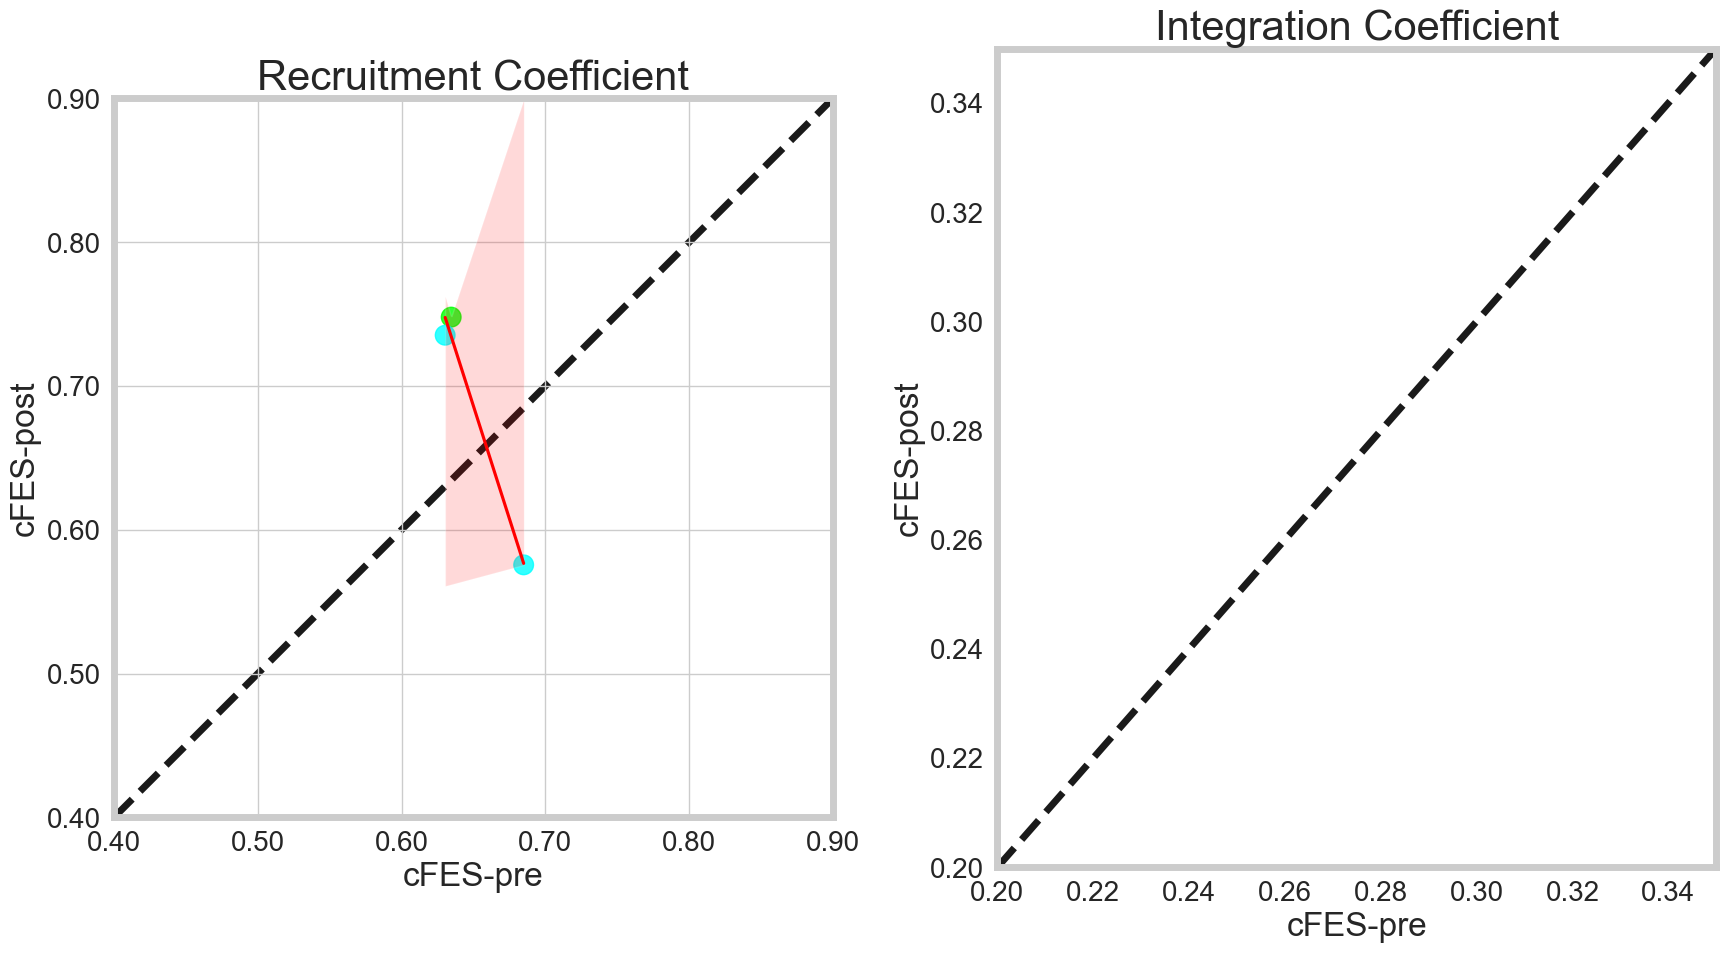

In [256]:
# RC/IC cFES
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
sns.set(style='white')

# rec_pre1_r_cfes, rec_post1_r_cfes, rec_fnets_plot1_r_cfes, rec_fnet_color1_r_cfes
# int_pre1_i_cfes, int_post1_i_cfes, int_fnets_plot1_i_cfes, int_fnet_color1_i_cfes
rec_pre1 = rec_pre1_r_cfes
rec_post1 = rec_post1_r_cfes
int_pre1 = int_pre1_i_cfes
int_post1 = int_post1_i_cfes
rec_fnets_plot1 = rec_fnets_plot1_r_cfes
rec_fnet_color1 = rec_fnet_color1_r_cfes

# Recruitment 1-3
sns.regplot(x=rec_pre1, y=rec_post1, ci=95, scatter_kws=scatter_kws_rec1, 
            line_kws={"color": "red", 'label': 'Regression line'}, ax=ax1)
ax1.set_xlabel(group_label[0], fontsize=24)
ax1.set_ylabel(group_label[1], fontsize=24)
ax1.set_title('Recruitment Coefficient', fontsize=30)

# Ensure min/max and intervals are the same for both axes
lims = [0.4, 0.90]
ax1.set_xlim(lims)
ax1.set_ylim(lims)
ax1.set_aspect('equal', adjustable='box')
ax1.plot(lims, lims, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth=5)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.tick_params(axis='both', labelsize=20)

# Integration 
sns.regplot(x=int_pre1, y=int_post1, ci=95, scatter_kws=scatter_kws_int1, 
            line_kws={"color": "red", 'label': 'Regression line'}, ax=ax2)
ax2.set_xlabel(group_label[0], fontsize=24)
ax2.set_ylabel(group_label[1], fontsize=24)
ax2.set_title('Integration Coefficient', fontsize=30)

lims1 = [0.20, 0.35]
ax2.set_xlim(lims1)
ax2.set_ylim(lims1)
ax2.plot(lims1, lims1, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth=5)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.tick_params(axis='both', labelsize=20)

# Customize spines
for ax in [ax1, ax2]:
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_linewidth(5)

plt.grid(False)
plt.rcParams["axes.grid"] = False
plt.tight_layout(pad=2.0)
plt.show()

In [130]:
# # RC/IC passive cycling
# fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
# sns.set(style='white')

# # rec_pre1_r_c, rec_post1_r_c, rec_fnets_plot1_r_c, rec_fnet_color1_r_c
# # int_pre1_i_c, int_post1_i_c, int_fnets_plot1_i_c, int_fnet_color1_i_c
# rec_pre1 = rec_pre1_r_c
# rec_post1 = rec_post1_r_c
# int_pre1 = int_pre1_i_c
# int_post1 = int_post1_i_c

# r_fnc1 = rec_fnet_color1_r_c
# i_fnc1 = int_fnet_color1_i_c

# r_fnc1 = [color_rgb[color] for color in r_fnc1]
# i_fnc1 = [color_rgb[color] for color in i_fnc1]

# scatter_kws_rec1 = {"color": r_fnc1, "s": 200}
# scatter_kws_int1 = {"color": i_fnc1, "s": 200}

# # Recruitment 1-3
# sns.regplot(x=rec_pre1, y=rec_post1, ci=95, scatter_kws=scatter_kws_rec1, 
#             line_kws={"color": "red", 'label': 'Regression line'}, ax=ax1)
# ax1.set_xlabel(group_label[2], fontsize=24)
# ax1.set_ylabel(group_label[3], fontsize=24)
# ax1.set_title('Recruitment Coefficient', fontsize=30)

# # Ensure min/max and intervals are the same for both axes
# lims = [0.4, 0.90]
# ax1.set_xlim(lims)
# ax1.set_ylim(lims)
# ax1.set_aspect('equal', adjustable='box')
# ax1.plot(lims, lims, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth=5)
# ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax1.tick_params(axis='both', labelsize=20)

# # Integration 
# sns.regplot(x=int_pre1, y=int_post1, ci=95, scatter_kws=scatter_kws_int1, 
#             line_kws={"color": "red", 'label': 'Regression line'}, ax=ax2)
# ax2.set_xlabel(group_label[2], fontsize=24)
# ax2.set_ylabel(group_label[3], fontsize=24)
# ax2.set_title('Integration Coefficient', fontsize=30)

# lims1 = [0.20, 0.35]
# ax2.set_xlim(lims1)
# ax2.set_ylim(lims1)
# ax2.plot(lims1, lims1, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth=5)
# ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax2.tick_params(axis='both', labelsize=20)

# # Customize spines
# for ax in [ax1, ax2]:
#     for location in ['left', 'right', 'top', 'bottom']:
#         ax.spines[location].set_linewidth(5)

# plt.grid(False)
# plt.rcParams["axes.grid"] = False
# plt.tight_layout(pad=2.0)
# plt.show()

#### 17. Plot brain glass visualization (significant regions of recruitment and integration coefficients)

In [131]:
# analysis = 'Pre_Post'
# diff_rec_abs1 = abs(cFES_pre_rec - cFES_post_rec)
# diff_int_abs1 = abs(cFES_pre_int - cFES_post_int)

# # diff_rec_abs1 = abs(c_pre_rec - c_post_rec)
# # diff_int_abs1 = abs(c_pre_int - c_post_int)

# # diff_rec_abs1 = abs(cFES_pre_rec - c_pre_rec)
# # diff_int_abs1 = abs(cFES_pre_int - c_pre_int)

# diff_rec1 = diff_rec_abs1 
# diff_int1 = diff_int_abs1 
# idx = 0
# # Function to validate and plot markers
# def plot_markers(coords, color, size, output_path, idx):
#     if len(coords) == len(color) == len(size) and len(coords) > 0:
#         # Proceed with plotting only if the lengths of arrays match and they are not empty
#         # idx=idx+1
#         print(f'View: {idx}')
#         view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
#         view.open_in_browser()
#         view.save_as_html(output_path)

#     else:
#         print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
#               f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
#         # idx=idx+1
        
# color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
#          'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
#          ,'cyan','cyan']
# # Recruitment pre-post
# # sig_rec2 = np.where((diff_rec1 >= 0.0))[0] #(diff_rec1 >= 0.2) & (pvalue_rec1 == 0)
# sig_rec2 = np.where((diff_rec1 < 0.05))[0] #(diff_rec1 >= 0.2) & (pvalue_rec1 == 0)
# sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
# color_g2 = [color[i] for i in sig_rec2_f]
# size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f]
# # coords_g2 = [atlas.region_coords[i] for i in sig_rec2]
# # color_g2 = [color[i] for i in sig_rec2]
# # size_g2 = [int(diff_rec[i] * 100) for i in sig_rec2]
# idx=idx+1
# plot_markers(coords_g2, color_g2, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)
# # color_gb

# # Integration pre-post
# # sig_int4 = np.where((diff_int1 >= 0.0) )[0] #& (pvalue_int1 == 0)
# sig_int4 = np.where((diff_int1 < 0.05) )[0] #& (pvalue_int1 == 0)
# filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
# coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
# color_g4 = [color[i] for i in filtered_sig_int4]
# size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]

# idx = idx+1
# plot_markers(coords_g4, color_g4, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# # View 1 = Rec PreFES vs PostFES
# # View 2 = Int PreFES vs PostFES

In [132]:
# analysis = 'Pre_Post'
# diff_rec_abs1 = np.abs(cFES_pre_rec - cFES_post_rec)
# diff_int_abs1 = np.abs(cFES_pre_int - cFES_post_int)

# diff_rec1 = diff_rec_abs1 
# diff_int1 = diff_int_abs1 

# idx = 0  # Plot index

# # Function to validate and plot markers
# def plot_markers(coords, color, size, output_path, idx):
#     if len(coords) == len(color) == len(size) and len(coords) > 0:
#         print(f'View: {idx}')
#         view = plotting.view_markers(coords, color, marker_size=np.array(size))
#         view.open_in_browser()
#         view.save_as_html(output_path)
#     else:
#         print(f"Skipping plot {idx}. Mismatched or empty input arrays — coords: {len(coords)}, color: {len(color)}, size: {len(size)}")

# # Color by network (you already defined this)
# color_gb = ['lime'] * 7 + ['cyan'] * 9 + ['lime'] * 7 + ['cyan'] * 12  # Total = 35

# # ===============================
# # Recruitment Pre vs Post
# # ===============================
# sig_rec2 = np.where((diff_rec1 < 0.05))[0]
# sig_rec2_f = [i for i in sig_rec2 if color_gb[i] == 'cyan']  # replace 'blue' with actual color
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
# color_g2 = [color_gb[i] for i in sig_rec2_f]
# size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f]

# idx += 1
# plot_markers(coords_g2, color_g2, size_g2,
#              f'/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes_{analysis}.html',
#              idx)

# # ===============================
# # Integration Pre vs Post
# # ===============================
# sig_int4 = np.where((diff_int1 < 0.05))[0]
# sig_int4_f = [i for i in sig_int4 if color_gb[i] == 'cyan']
# coords_g4 = [atlas.region_coords[i] for i in sig_int4_f]
# color_g4 = [color_gb[i] for i in sig_int4_f]
# size_g4 = [int(diff_int1[i] * 200) for i in sig_int4_f]

# idx += 1
# plot_markers(coords_g4, color_g4, size_g4,
#              f'/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes_{analysis}.html',
#              idx)


In [133]:
# # rec_pre1 = rec_pre1_r_cfes
# # rec_post1 = rec_post1_r_cfes
# diff_rec_abs1 = abs(cFES_pre_rec - cFES_post_rec)
# diff_int_abs1 = abs(cFES_pre_int - cFES_post_int)


# # diff_rec = diff_rec_abs
# diff_rec1 = diff_rec_abs1
# # diff_int = diff_int_abs
# diff_int1 = diff_int_abs1 
# idx = 0

# lime = (0, 1, 1)
# cyan = (0, 1, 0)


# # Function to validate and plot markers
# def plot_markers(coords, color, size, output_path, idx):
#     if len(coords) == len(color) == len(size) and len(coords) > 0:
#         # Proceed with plotting only if the lengths of arrays match and they are not empty
#         # idx=idx+1
#         print(f'View: {idx}')
#         view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
#         view.open_in_browser()
#         view.save_as_html(output_path)

#     else:
#         print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
#               f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
#         # idx=idx+1

        
# # color_g2b = ['purple', cyan, lime, lime, lime, lime, lime, lime, lime, lime, 'green','violet', lime,
# #               lime, lime, lime, lime, lime, lime, lime, lime, lime, lime,'green','orange','orange','red']
# color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
#          'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
#          ,'cyan','cyan']

# color_gb2 = rec_fnet_color1_r_cfes
        
# # Recruitment 
# # sig_rec2 = np.where((diff_rec1 >= 0.0))[0] 
# sig_rec2 = np.where((diff_rec1 < 0.05))[0]  
# sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
# color_g2 = [color[i] for i in sig_rec2_f]
# size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f] 
# idx=idx+1
# size_g2 = [x + 10 for x in size_g2]
# plot_markers(coords_g2, color_gb2, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)

# # Integration 
# # sig_int4 = np.where((diff_int1 >= 0.0))[0] 
# sig_int4 = np.where((diff_int1 < 0.05))[0]
# filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
# coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
# color_g4 = [color[i] for i in filtered_sig_int4]
# size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]

# size_g4 = [x + 10 for x in size_g4]
# color_gb4 = int_fnet_color1_i_cfes

# idx = idx+1
# plot_markers(coords_g4, color_gb4, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)


In [134]:

# diff_rec_abs1 = abs(c_pre_rec - c_post_rec)
# diff_int_abs1 = abs(c_pre_int - c_post_int)

# # diff_rec = diff_rec_abs
# diff_rec1 = diff_rec_abs1
# # diff_int = diff_int_abs
# diff_int1 = diff_int_abs1 
# idx = 0

# lime = (0, 1, 1)
# cyan = (0, 1, 0)


# # Function to validate and plot markers
# def plot_markers(coords, color, size, output_path, idx):
#     if len(coords) == len(color) == len(size) and len(coords) > 0:
#         # Proceed with plotting only if the lengths of arrays match and they are not empty
#         # idx=idx+1
#         print(f'View: {idx}')
#         view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
#         view.open_in_browser()
#         view.save_as_html(output_path)

#     else:
#         print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
#               f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
#         # idx=idx+1

        
# # color_g2b = ['purple', cyan, lime, lime, lime, lime, lime, lime, lime, lime, 'green','violet', lime,
# #               lime, lime, lime, lime, lime, lime, lime, lime, lime, lime,'green','orange','orange','red']
# color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
#          'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
#          ,'cyan','cyan']

# color_gb2 = rec_fnet_color1_r_c
        
# # Recruitment 1-3
# # sig_rec2 = np.where((diff_rec1 >= 0.0))[0] 
# sig_rec2 = np.where((diff_rec1 < 0.05))[0]  
# sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
# color_g2 = [color[i] for i in sig_rec2_f]
# size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f] 
# idx=idx+1
# size_g2 = [x + 10 for x in size_g2]

# plot_markers(coords_g2, color_gb2, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)

# # Integration 1-3
# # sig_int4 = np.where((diff_int1 >= 0.0))[0] 
# sig_int4 = np.where((diff_int1 < 0.05))[0]
# filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
# coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
# color_g4 = [color[i] for i in filtered_sig_int4]
# size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]
# size_g4 = [x + 10 for x in size_g4]

# color_gb4 = int_fnet_color1_i_c

# idx = idx+1
# plot_markers(coords_g4, color_gb4, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)


In [135]:
# cl_pre_SMN_cfes, cl_post_SMN_cfes
# cl_pre_SMN_c, cl_post_SMN_c

# x_alg_SMN_cfes, z_alg_SMN_cfes
# x_alg_SMN_c, z_alg_SMN_c

# x_rec_SMN_cfes, z_rec_SMN_cfes, x_rec_SMN_c, z_rec_SMN_c
# x_int_SMN_cfes, z_int_SMN_cfes, x_int_SMN_c, z_int_SMN_c

# rec_pvalue_cfes
# int_pvalue_cfes
# rec_pvalue_c
# int_pvalue_c
# alg_pvalue_cfes
# alg_pvalue_c
# len(rec_pre1_r_cfes)
# len(int_pre1_i_cfes)

#### 18.  Plot allegiance matrix all regions 200x200

In [257]:
# # S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post
alg_a = x_alg_SMN_cfes
alg_b = z_alg_SMN_cfes
alg_c = alg_pvalue_delta

# # alg_a = x_alg_SMN_c
# # alg_b = z_alg_SMN_c
# # alg_c = alg_pvalue_c

# # x_alg_SMN_c, z_alg_SMN_c
# # x_alg_SMN_cfes, z_alg_SMN_cfes

# # alg_cFES_pre
# # alg_cFES_post
# # alg_pvalue_perm

# # alg_a = alg_c_pre
# # alg_b = alg_c_post
# # alg_c = alg_pvalue

# alg_a = alg_S1_cFES
# alg_b = alg_cFES_post
# alg_c = alg_pvalue


# alg_a = np.nan_to_num(alg_a, nan=0)
# alg_b = np.nan_to_num(alg_b, nan=0)
# alg_c = np.nan_to_num(alg_c, nan=0)

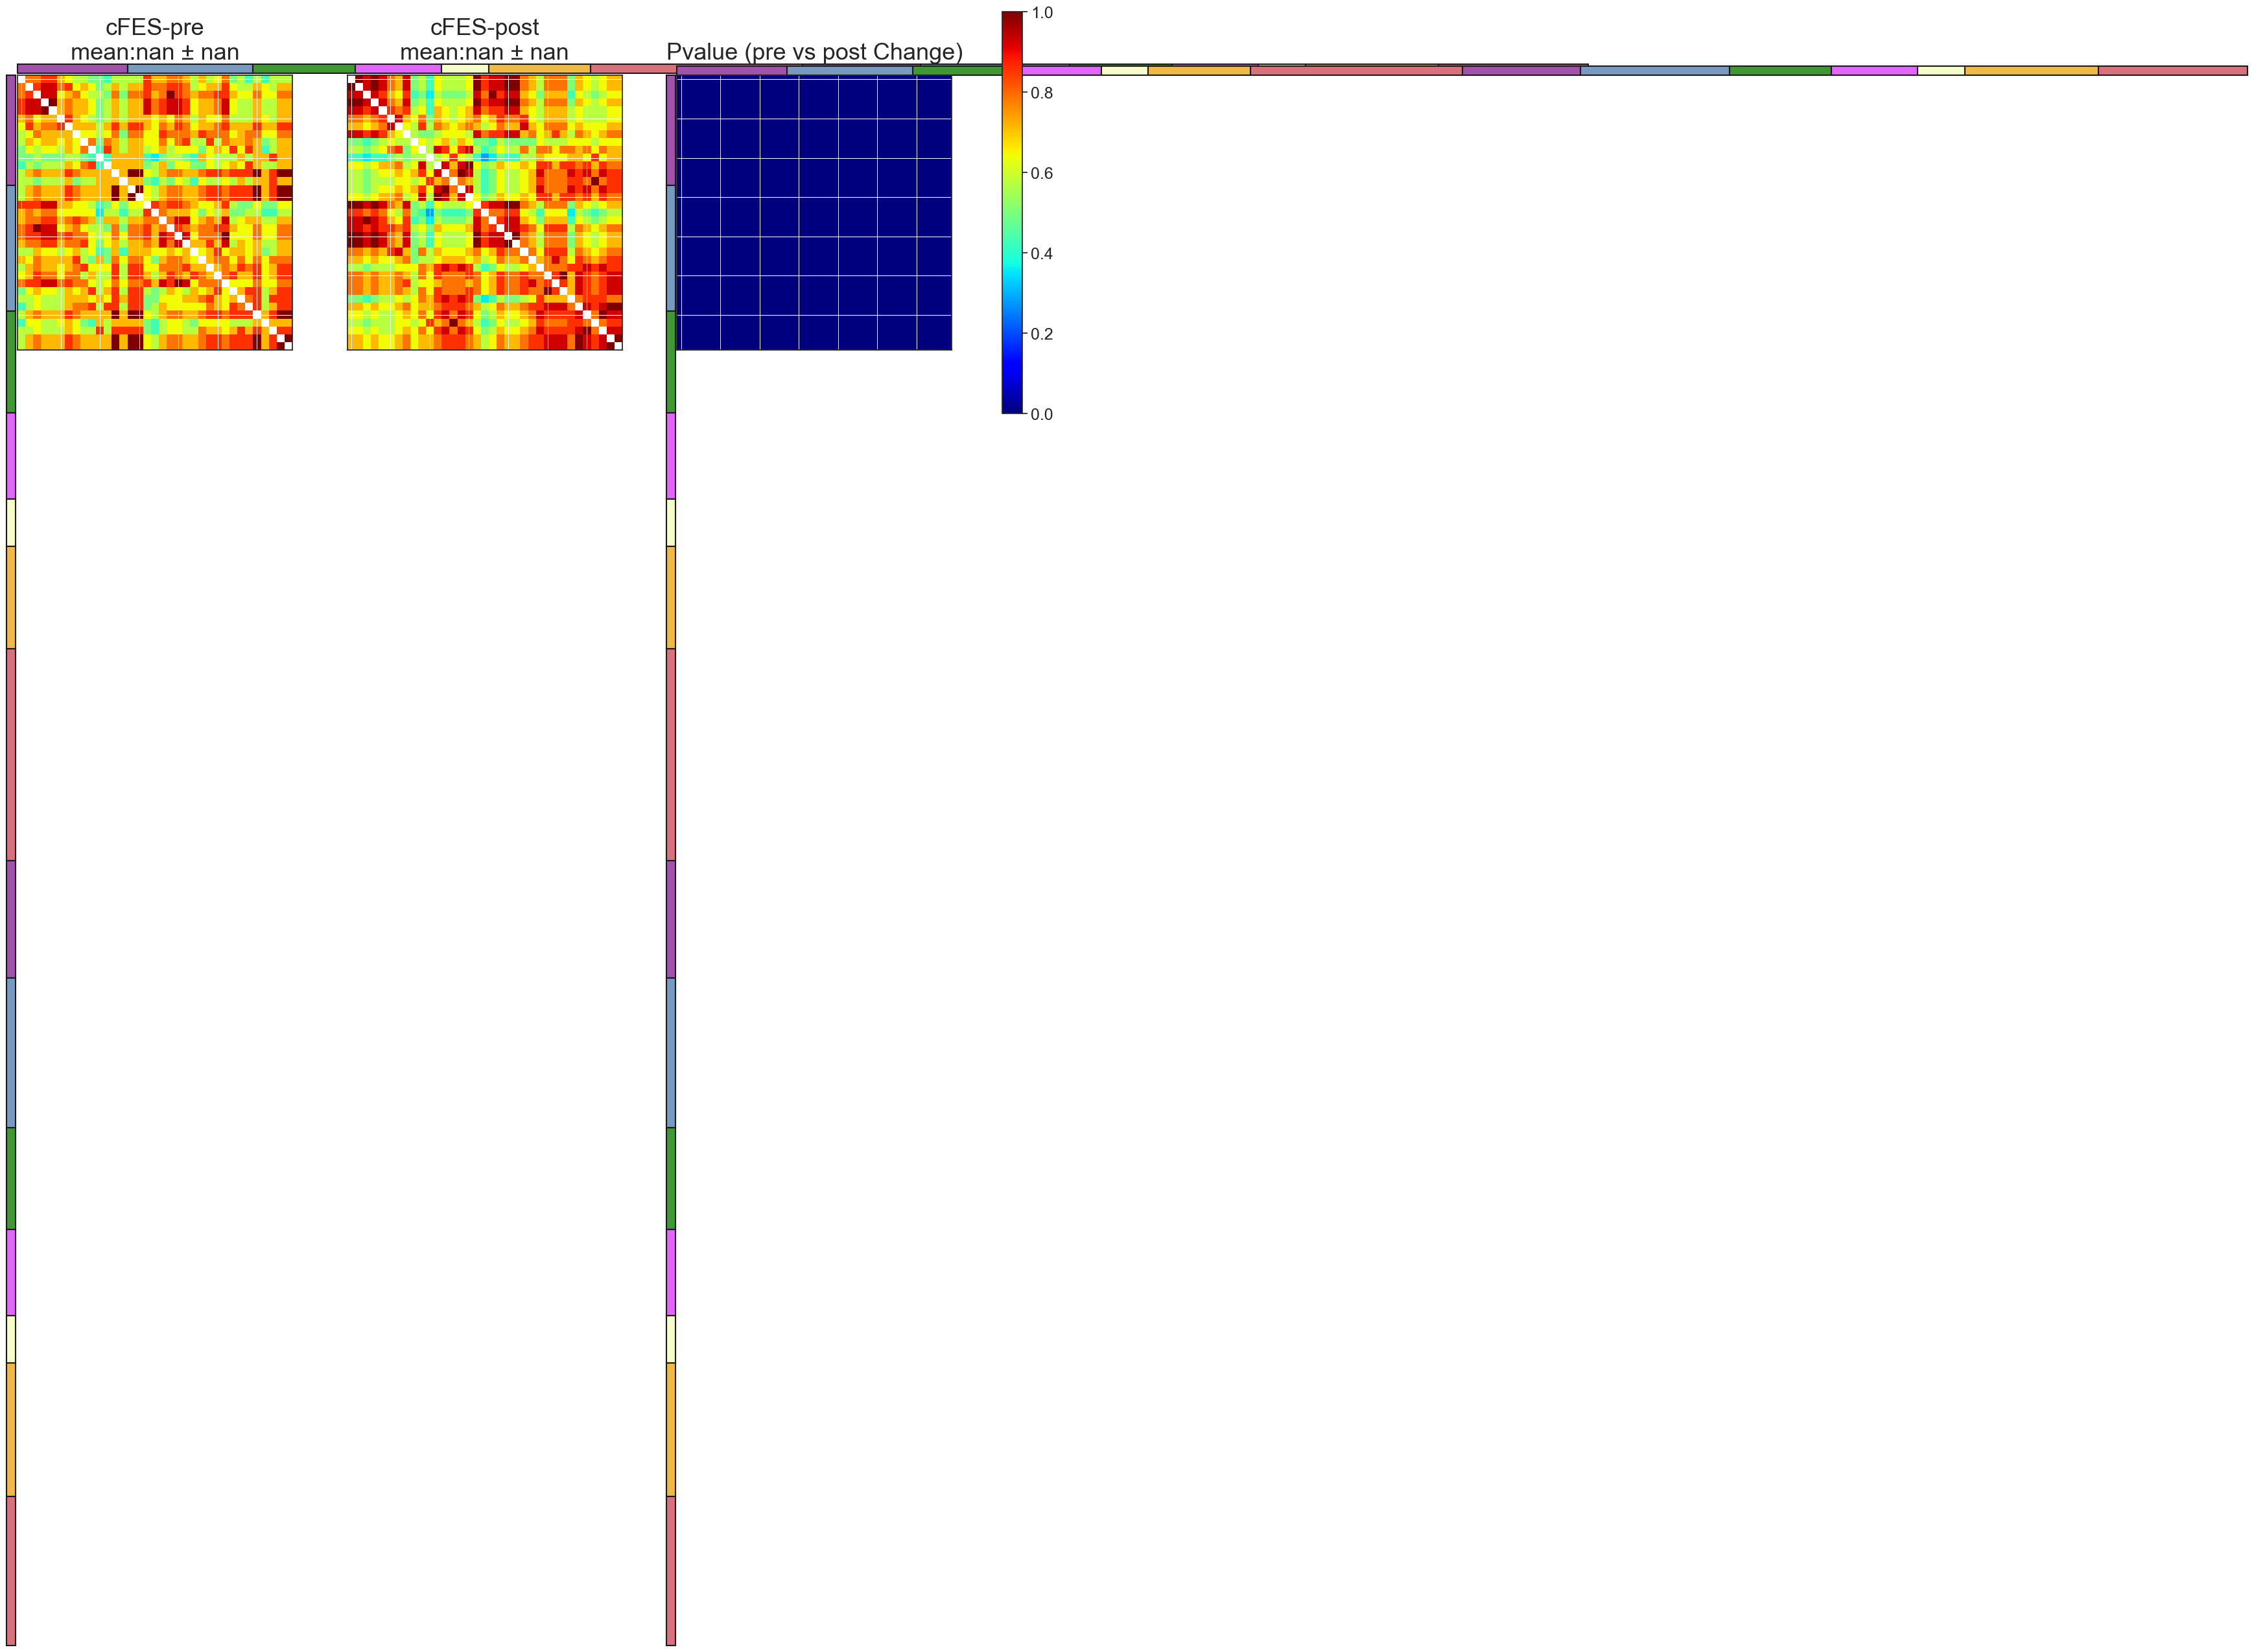

In [261]:
# Allegiance matrix 200x200 
cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap

# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(20, 10))  # 1 row, 3 columns

# Plot the first matrix
# plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
im1 = axs[0].matshow(alg_a, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'cFES-pre\nmean:{np.mean(alg_a):.4f} ± {np.std(alg_a):.4f}', fontsize=26, y=1.04)

# Plot the second matrix
im2 = axs[1].matshow(alg_b, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'cFES-post\nmean:{np.mean(alg_b):.4f} ± {np.std(alg_b):.4f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(alg_c, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue (pre vs post Change)', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[2].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# # Add a single colorbar for all subplots
cbar = fig.colorbar(im2, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

In [138]:
# alg_diff = np.abs(alg_b - alg_a)
# diff_thresh = threshold_matrix(alg_diff)

In [139]:

# # Define color map
# cmap = 'jet'  # Other options: 'rainbow', 'twilight', etc.

# # Create a single plot
# fig, ax = plt.subplots(figsize=(8, 8))

# # Plot the allegiance matrix
# im = ax.matshow(alg_diff, vmin=0, vmax=1, cmap=cmap)
# mean_val = np.mean(alg_diff)
# std_val = np.std(alg_diff)
# ax.set_title(f'Allegiance Matrix Diff- (cFES-post - cFES-pre)',fontsize=24, y=1.05)

# # Customize axis
# ax.tick_params(
#     axis='both',
#     which='both',
#     bottom=False,
#     top=False,
#     left=False,
#     right=False,
#     labelbottom=False,
#     labelleft=False
# )
# ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add a colorbar
# cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=14)

# plt.tight_layout()
# plt.show()
 
# #######Thresholded    
# # Define color map
# cmap = 'Greys'  # Other options: 'rainbow', 'twilight', etc.

# # Create a single plot
# fig, ax = plt.subplots(figsize=(8, 8))

# # Plot the allegiance matrix
# im = ax.matshow(diff_thresh, vmin=0, vmax=1, cmap=cmap)
# mean_val = np.mean(diff_thresh)
# std_val = np.std(diff_thresh)
# ax.set_title(f'Allegiance Matrix Diff- (cFES-post - cFES-pre) \n [0.05 Threshold]',fontsize=24, y=1.05)

# # Customize axis
# ax.tick_params(
#     axis='both',
#     which='both',
#     bottom=False,
#     top=False,
#     left=False,
#     right=False,
#     labelbottom=False,
#     labelleft=False
# )
# ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add a colorbar
# cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=14)

# plt.tight_layout()
# plt.show()


In [140]:
# def threshold_matrices(allegiance_matx):

#     # Unpack matrices
#     A, B, C = allegiance_matx

#     # Detect matrix size
#     if A.shape != B.shape or A.shape != C.shape:
#         raise ValueError("All matrices must have the same dimensions.")
    
#     # Threshold matrix C
#     C_thresh = np.where(C <= 0.05, 1, 0)

#     # Use C_thresh to threshold A and B
#     A_thresh = A * C_thresh
#     B_thresh = B * C_thresh

#     # Display results
#     print(f'Shape of thresholded matrices: {A_thresh.shape}, {B_thresh.shape}, {C_thresh.shape}')
    
#     return A_thresh, B_thresh, C_thresh

# # Call function
# # A_thresh, B_thresh, C_thresh = threshold_matrices([alg_a, alg_b, alg_c])


In [141]:
# cmap = 'Greys' # Greys jet
# # np.set_printoptions(precision=2)
# fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# # Plot the first matrix
# # plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
# im1 = axs[0].matshow(A_thresh, vmin=0, vmax=1, cmap=cmap)
# axs[0].set_title(f'cFES_pre\nmean:{np.mean(alg_a):.2f} std:{np.std(alg_a):.2f}', fontsize=26, y=1.04)


# # Plot the second matrix
# im2 = axs[1].matshow(B_thresh, vmin=0, vmax=1, cmap=cmap)
# axs[1].set_title(f'cFES_post\nmean:{np.mean(alg_b):.2f} std:{np.std(alg_b):.2f}', fontsize=26, y=1.04)

# # Plot the third matrix
# im3 = axs[2].matshow(C_thresh, vmin=0, vmax=1, cmap=cmap)
# axs[2].set_title(f'Pvalue (Pre vs Post)', fontsize=26, y=1.04)

# # Adjust ticks and gridlines for all subplots
# for ax in axs:
#     ax.tick_params(
#         axis='both',       # changes apply to the x,y-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,        # ticks along the left edge are off
#         right=False,       # ticks along the right edge are off
#         labeltop=False,    # labels along the top edge are off
#         labelleft=False    # labels along the left edge are off
#     )
#     ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add rectangle objects as tick labels (X axis)
# xmin, xmax, ymin, ymax = axs[0].axis()
# h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

# axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# # Add rectangle objects as tick labels (Y axis)
# w = (ymax-ymin)/30; i = ymax # intercept
# axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # # Add a single colorbar for all subplots
# cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
# cbar.ax.tick_params(labelsize=18)

# plt.show()

#### 16. Plot allegiance matrix for SMN region only  

In [142]:
# # alg_a = x_alg_SMN_cfes
# # alg_b = z_alg_SMN_cfes
# # alg_c = alg_pvalue_cfes

# # alg_a = x_alg_SMN_c
# # alg_b = z_alg_SMN_c
# # alg_c = alg_pvalue_c


# # alg_smn_a = x_alg_SMN_cfes
# # alg_smn_b = z_alg_SMN_cfes
# # pvalue_smn_alg_c = alg_pvalue_cfes


# alg_smn_a = x_alg_SMN_c
# alg_smn_b = z_alg_SMN_c
# pvalue_smn_alg_c = alg_pvalue_c


# alg_smn_a = np.nan_to_num(alg_smn_a, nan=0)
# alg_smn_b = np.nan_to_num(alg_smn_b, nan=0)
# # alg_c = np.nan_to_num(alg_c, nan=0)
# # x_alg_SMN_cfes, z_alg_SMN_cfes

In [143]:
# cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# # 
# # np.set_printoptions(precision=2)
# fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# # Plot the first matrix 
# im1 = axs[0].matshow(alg_smn_a, vmin=0, vmax=1, cmap=cmap)
# axs[0].set_title(f'c_pre SMN\nmean:{np.mean(alg_smn_a):.4f} std:{np.std(alg_smn_a):.4f}', fontsize=26, y=1.04)


# # Plot the second matrix
# im2 = axs[1].matshow(alg_smn_b, vmin=0, vmax=1, cmap=cmap)
# axs[1].set_title(f'c_post SMN\nmean:{np.mean(alg_smn_b):.4f} std:{np.std(alg_smn_b):.4f}', fontsize=26, y=1.04)

# # Plot the third matrix
# im3 = axs[2].matshow(pvalue_smn_alg_c, vmin=0, vmax=1, cmap=cmap)
# axs[2].set_title(f'Pvalue SMN(pre vs post)', fontsize=26, y=1.04)

# # Adjust ticks and gridlines for all subplots
# for ax in axs:
#     ax.tick_params(
#         axis='both',       # changes apply to the x,y-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,        # ticks along the left edge are off
#         right=False,       # ticks along the right edge are off
#         labeltop=False,    # labels along the top edge are off
#         labelleft=False    # labels along the left edge are off
#     )
#     ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add rectangle objects as tick labels (X axis)
# xmin, xmax, ymin, ymax = axs[0].axis()
# h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept


# # # Add a single colorbar for all subplots
# cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
# cbar.ax.tick_params(labelsize=18)

# plt.show()

#### Allegiance Difference (Post-Pre) 

In [144]:
# alg_diff_smn = np.abs(alg_smn_b - alg_smn_a)
# print(f'Allegiance Diff: {alg_diff_smn.shape}')
# df_alg_diff = pd.DataFrame(alg_diff_smn)
# file_path = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/alg_diff.xlsx"
# df_alg_diff.to_excel(file_path, index=False)

In [145]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define color map
# cmap = 'jet'  # Other options: 'rainbow', 'twilight', etc.

# # Create a single plot
# fig, ax = plt.subplots(figsize=(8, 8))

# # Plot the allegiance matrix
# im = ax.matshow(alg_diff_smn, vmin=0, vmax=1, cmap=cmap)
# mean_val = np.mean(alg_diff_smn)
# std_val = np.std(alg_diff_smn)
# ax.set_title(f'Allegiance Matrix Diff- (cFES-post - cFES-pre) SMN',fontsize=24, y=1.05)

# # Customize axis
# ax.tick_params(
#     axis='both',
#     which='both',
#     bottom=False,
#     top=False,
#     left=False,
#     right=False,
#     labelbottom=False,
#     labelleft=False
# )
# ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add a colorbar
# cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=14)

# plt.tight_layout()
# plt.show()


In [146]:
# def threshold_matrix(input_matrix, threshold=0.05):
#     return np.where(input_matrix < threshold, input_matrix, 0)
# diff_thresh_smn = threshold_matrix(alg_diff_smn)

In [147]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define color map
# cmap = 'Greys'  # Other options: 'rainbow', 'twilight', etc.

# # Create a single plot
# fig, ax = plt.subplots(figsize=(8, 8))

# # Plot the allegiance matrix
# im = ax.matshow(diff_thresh_smn, vmin=0, vmax=1, cmap=cmap)
# mean_val = np.mean(diff_thresh_smn)
# std_val = np.std(diff_thresh_smn)
# ax.set_title(f'Allegiance Matrix - (cFES-post - cFES-pre) \nSMN [0.05 Threshold]',fontsize=24, y=1.05)

# # Customize axis
# ax.tick_params(
#     axis='both',
#     which='both',
#     bottom=False,
#     top=False,
#     left=False,
#     right=False,
#     labelbottom=False,
#     labelleft=False
# )
# ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add a colorbar
# cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=14)

# plt.tight_layout()
# plt.show()


In [148]:
# A_thresh_smn, B_thresh_smn, C_thresh_smn = threshold_matrices([alg_smn_a, alg_smn_b, pvalue_smn_alg_c])

In [149]:
# cmap = 'Greys'  # Greys, jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# # 
# # np.set_printoptions(precision=2)
# fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# # Plot the first matrix 
# im1 = axs[0].matshow(A_thresh_smn, vmin=0, vmax=1, cmap=cmap)
# axs[0].set_title(f'cFES_pre SMN\nmean:{np.mean(alg_smn_a):.2f} std:{np.std(alg_smn_a):.2f}', fontsize=26, y=1.04)

# # Plot the second matrix
# im2 = axs[1].matshow(B_thresh_smn, vmin=0, vmax=1, cmap=cmap)
# axs[1].set_title(f'cFES_post SMN\nmean:{np.mean(alg_smn_b):.2f} std:{np.std(alg_smn_b):.2f}', fontsize=26, y=1.04)

# # Plot the third matrix
# im3 = axs[2].matshow(C_thresh_smn, vmin=0, vmax=1, cmap=cmap)
# axs[2].set_title(f'Pvalue SMN(Pre vs Post)', fontsize=26, y=1.04)

# # Adjust ticks and gridlines for all subplots
# for ax in axs:
#     ax.tick_params(
#         axis='both',       # changes apply to the x,y-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,        # ticks along the left edge are off
#         right=False,       # ticks along the right edge are off
#         labeltop=False,    # labels along the top edge are off
#         labelleft=False    # labels along the left edge are off
#     )
#     ax.grid(color='white', linestyle='-', linewidth=0.7)

# # Add rectangle objects as tick labels (X axis)
# xmin, xmax, ymin, ymax = axs[0].axis()
# h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept


# # # Add a single colorbar for all subplots
# cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
# cbar.ax.tick_params(labelsize=18)

# plt.show()

In [150]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 1 day, 8:05:02.090944


In [46]:
# import pkg_resources

# installed_packages = pkg_resources.working_set
# for package in installed_packages:
#     print(f"{package.key}=={package.version}")